# Airline Passenger Satisfaction Analysis
## Understanding What Makes Passengers Happy vs Frustrated

This analysis aims to identify the key factors that drive passenger satisfaction and dissatisfaction in airline experiences using a dataset of 23,617 airline reviews.

### Research Questions:
1. **Which service aspects** (seat comfort, staff service, food, ground service, entertainment, wifi, value) most strongly predict overall satisfaction?
2. **What distinguishes** highly satisfied passengers from frustrated ones?
3. **How do satisfaction drivers vary** across different traveler types, seat classes, and routes?
4. **What themes emerge** from text reviews that complement numerical ratings?

### Analysis Approach:
1. **Quantitative Analysis**: Correlation analysis, regression modeling, satisfaction segmentation
2. **Qualitative Analysis**: Text mining of reviews for sentiment and theme extraction
3. **Comparative Analysis**: Cross-segment analysis by traveler type, class, route
4. **Predictive Modeling**: Build models to predict satisfaction based on service ratings

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

In [2]:
# Load the dataset
df = pd.read_csv('Airline Review.csv', index_col=0)

print("Dataset Shape:", df.shape)
print("\nColumn Information:")
print("="*50)
for i, col in enumerate(df.columns):
    print(f"{i+1:2d}. {col}")
    
print(f"\nDataset contains {len(df):,} airline reviews")
print(f"Date range: {df['Review Date'].min()} to {df['Review Date'].max()}")
print(f"Number of unique airlines: {df['Airline Name'].nunique()}")
print(f"Number of unique routes: {df['Route'].nunique()}")

Dataset Shape: (23171, 19)

Column Information:
 1. Airline Name
 2. Overall_Rating
 3. Review_Title
 4. Review Date
 5. Verified
 6. Review
 7. Aircraft
 8. Type Of Traveller
 9. Seat Type
10. Route
11. Date Flown
12. Seat Comfort
13. Cabin Staff Service
14. Food & Beverages
15. Ground Service
16. Inflight Entertainment
17. Wifi & Connectivity
18. Value For Money
19. Recommended

Dataset contains 23,171 airline reviews
Date range: 10th April 2005 to 9th September 2022
Number of unique airlines: 497
Number of unique routes: 13607


In [3]:
# Examine data types and missing values
print("DATA TYPES AND MISSING VALUES")
print("="*50)
info_data = []
for col in df.columns:
    dtype = str(df[col].dtype)
    missing = df[col].isnull().sum()
    missing_pct = (missing / len(df)) * 100
    unique_vals = df[col].nunique()
    info_data.append([col, dtype, missing, f"{missing_pct:.1f}%", unique_vals])

info_df = pd.DataFrame(info_data, columns=['Column', 'Data Type', 'Missing Count', 'Missing %', 'Unique Values'])
print(info_df.to_string(index=False))

DATA TYPES AND MISSING VALUES
                Column Data Type  Missing Count Missing %  Unique Values
          Airline Name    object              0      0.0%            497
        Overall_Rating    object              0      0.0%             10
          Review_Title    object              0      0.0%          17219
           Review Date    object              0      0.0%           4557
              Verified      bool              0      0.0%              2
                Review    object              0      0.0%          23046
              Aircraft    object          16042     69.2%           1048
     Type Of Traveller    object           3738     16.1%              4
             Seat Type    object           1096      4.7%              4
                 Route    object           3828     16.5%          13607
            Date Flown    object           3754     16.2%            109
          Seat Comfort   float64           4155     17.9%              6
   Cabin Staff Servic

SATISFACTION VARIABLES ANALYSIS
Overall Rating Distribution:
  Rating 1.0: 11,595 reviews (50.0%)
  Rating 2.0: 2,296 reviews (9.9%)
  Rating 3.0: 1,356 reviews (5.9%)
  Rating 4.0: 859 reviews (3.7%)
  Rating 5.0: 830 reviews (3.6%)
  Rating 6.0: 675 reviews (2.9%)
  Rating 7.0: 1,193 reviews (5.1%)
  Rating 8.0: 1,757 reviews (7.6%)
  Rating 9.0: 1,768 reviews (7.6%)

Overall Rating Statistics:
  Mean: 3.14
  Median: 1.00
  Std Dev: 2.88

Recommendation Distribution:
  no: 15,364 reviews (66.3%)
  yes: 7,807 reviews (33.7%)

Traveler Type Distribution:
  Solo Leisure: 7,120 reviews (36.6%)
  Couple Leisure: 5,265 reviews (27.1%)
  Family Leisure: 4,352 reviews (22.4%)
  Business: 2,696 reviews (13.9%)

Seat Type Distribution:
  Economy Class: 19,145 reviews (86.7%)
  Business Class: 2,098 reviews (9.5%)
  Premium Economy: 646 reviews (2.9%)
  First Class: 186 reviews (0.8%)

📊 VISUALIZATIONS:


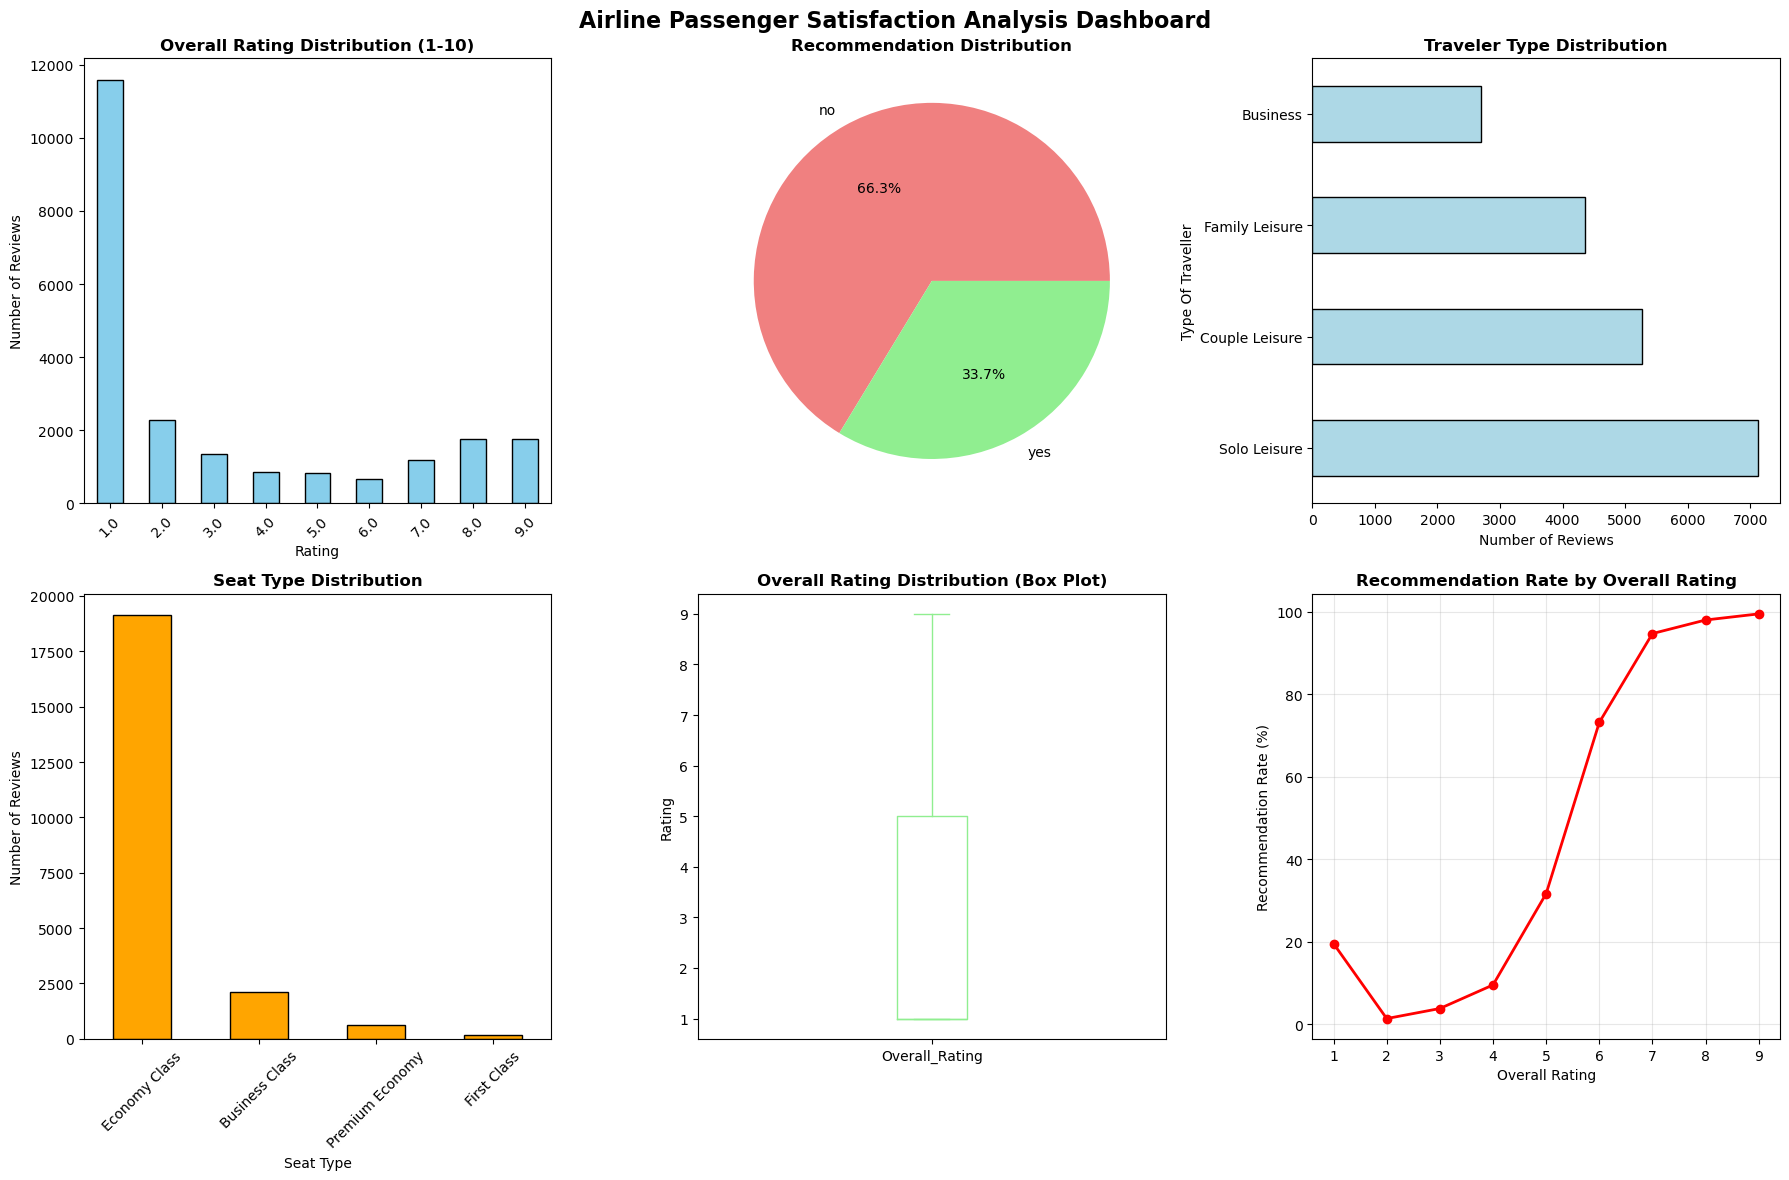

In [23]:
# Analyze satisfaction variables
print("SATISFACTION VARIABLES ANALYSIS")
print("="*50)

# Convert Overall_Rating to numeric
df['Overall_Rating'] = pd.to_numeric(df['Overall_Rating'], errors='coerce')

# Overall Rating distribution
print("Overall Rating Distribution:")
rating_dist = df['Overall_Rating'].value_counts().sort_index()
for rating, count in rating_dist.items():
    pct = (count / len(df)) * 100
    print(f"  Rating {rating}: {count:,} reviews ({pct:.1f}%)")

print(f"\nOverall Rating Statistics:")
print(f"  Mean: {df['Overall_Rating'].mean():.2f}")
print(f"  Median: {df['Overall_Rating'].median():.2f}")
print(f"  Std Dev: {df['Overall_Rating'].std():.2f}")

# Recommendation distribution
print(f"\nRecommendation Distribution:")
rec_dist = df['Recommended'].value_counts()
for rec, count in rec_dist.items():
    pct = (count / len(df)) * 100
    print(f"  {rec}: {count:,} reviews ({pct:.1f}%)")

# Traveler type and seat type distributions
print(f"\nTraveler Type Distribution:")
traveler_dist = df['Type Of Traveller'].value_counts()
for traveler, count in traveler_dist.items():
    pct = (count / df['Type Of Traveller'].count()) * 100
    print(f"  {traveler}: {count:,} reviews ({pct:.1f}%)")

print(f"\nSeat Type Distribution:")
seat_dist = df['Seat Type'].value_counts()
for seat, count in seat_dist.items():
    pct = (count / df['Seat Type'].count()) * 100
    print(f"  {seat}: {count:,} reviews ({pct:.1f}%)")

# Visualizations for satisfaction variables
print(f"\n📊 VISUALIZATIONS:")
print("="*50)

# Create a comprehensive visualization dashboard
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Airline Passenger Satisfaction Analysis Dashboard', fontsize=16, fontweight='bold')

# 1. Overall Rating Distribution
rating_dist.plot(kind='bar', ax=axes[0,0], color='skyblue', edgecolor='black')
axes[0,0].set_title('Overall Rating Distribution (1-10)', fontweight='bold')
axes[0,0].set_xlabel('Rating')
axes[0,0].set_ylabel('Number of Reviews')
axes[0,0].tick_params(axis='x', rotation=45)

# 2. Recommendation Distribution
rec_dist.plot(kind='pie', ax=axes[0,1], autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'])
axes[0,1].set_title('Recommendation Distribution', fontweight='bold')
axes[0,1].set_ylabel('')

# 3. Traveler Type Distribution
traveler_dist.plot(kind='barh', ax=axes[0,2], color='lightblue', edgecolor='black')
axes[0,2].set_title('Traveler Type Distribution', fontweight='bold')
axes[0,2].set_xlabel('Number of Reviews')

# 4. Seat Type Distribution
seat_dist.plot(kind='bar', ax=axes[1,0], color='orange', edgecolor='black')
axes[1,0].set_title('Seat Type Distribution', fontweight='bold')
axes[1,0].set_xlabel('Seat Type')
axes[1,0].set_ylabel('Number of Reviews')
axes[1,0].tick_params(axis='x', rotation=45)

# 5. Rating Statistics Box Plot
df['Overall_Rating'].plot(kind='box', ax=axes[1,1], color='lightgreen')
axes[1,1].set_title('Overall Rating Distribution (Box Plot)', fontweight='bold')
axes[1,1].set_ylabel('Rating')

# 6. Rating vs Recommendation
recommendation_by_rating = df.groupby('Overall_Rating')['Recommended'].apply(lambda x: (x == 'yes').mean() * 100)
recommendation_by_rating.plot(kind='line', ax=axes[1,2], marker='o', color='red', linewidth=2)
axes[1,2].set_title('Recommendation Rate by Overall Rating', fontweight='bold')
axes[1,2].set_xlabel('Overall Rating')
axes[1,2].set_ylabel('Recommendation Rate (%)')
axes[1,2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

SERVICE RATINGS CORRELATION ANALYSIS
Correlation with Overall Rating (1-10 scale):
------------------------------------------------------------
Value For Money          : 0.602 (n=22,105)
Ground Service           : 0.558 (n=18,378)
Cabin Staff Service      : 0.506 (n=18,911)
Seat Comfort             : 0.471 (n=19,016)
Food & Beverages         : 0.422 (n=14,500)
Wifi & Connectivity      : 0.353 (n=5,920)
Inflight Entertainment   : 0.298 (n=10,829)

SERVICE RATINGS STATISTICS (1-5 scale)
------------------------------------------------------------
       Seat Comfort  Cabin Staff Service  Food & Beverages  Ground Service  \
count      19016.00             18911.00          14500.00        18378.00   
mean           2.62                 2.87              2.55            2.35   
std            1.46                 1.60              1.53            1.60   
min            0.00                 0.00              0.00            1.00   
25%            1.00                 1.00              1.00

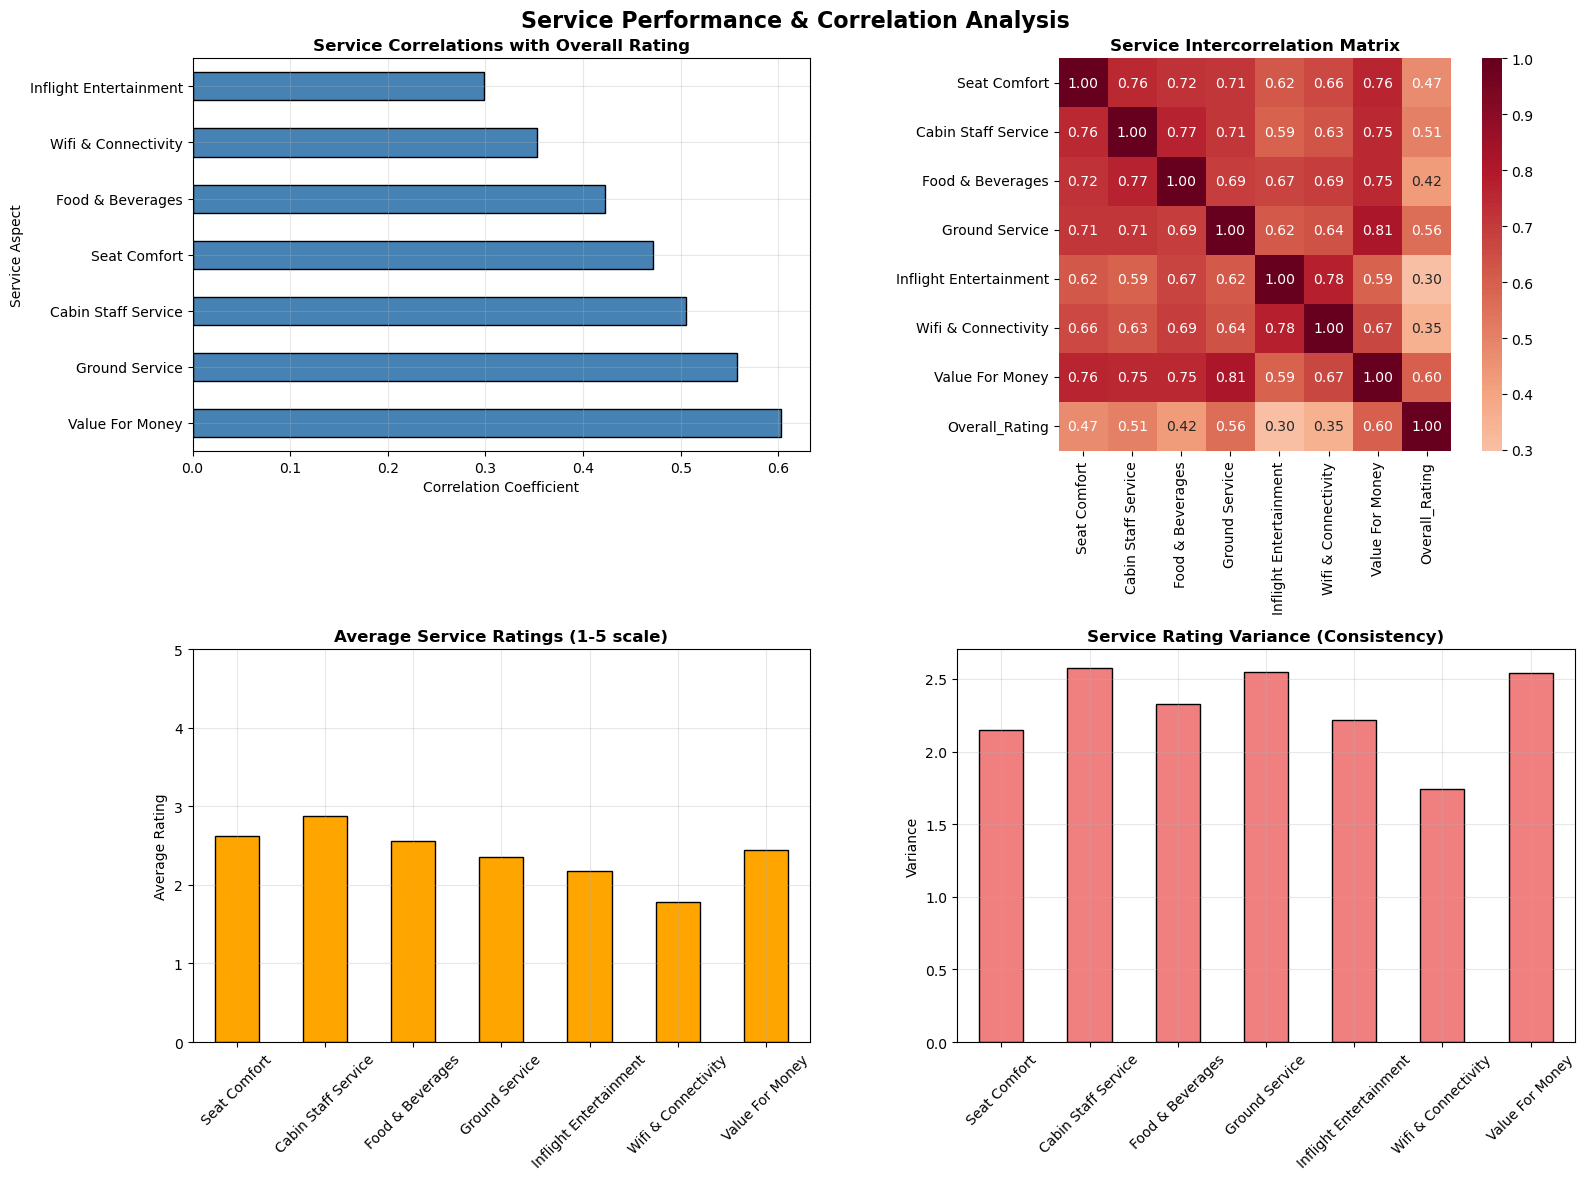


🎯 KEY SERVICE INSIGHTS:
  • Strongest predictor: Value For Money (r=0.602)
  • Weakest predictor: Inflight Entertainment (r=0.298)
  • Best performing: Cabin Staff Service (2.87/5)
  • Most consistent: Wifi & Connectivity (variance: 1.739)
  • Most variable: Cabin Staff Service (variance: 2.575)


In [24]:
# Analyze service rating correlations with overall satisfaction
print("SERVICE RATINGS CORRELATION ANALYSIS")
print("="*60)

# Define service rating columns
service_cols = ['Seat Comfort', 'Cabin Staff Service', 'Food & Beverages', 
                'Ground Service', 'Inflight Entertainment', 'Wifi & Connectivity', 
                'Value For Money']

# Calculate correlations with Overall Rating
correlations = []
for col in service_cols:
    corr = df[col].corr(df['Overall_Rating'])
    n_reviews = df[col].count()
    correlations.append([col, corr, n_reviews])

# Sort by correlation strength
corr_df = pd.DataFrame(correlations, columns=['Service Aspect', 'Correlation with Overall Rating', 'Sample Size'])
corr_df = corr_df.sort_values('Correlation with Overall Rating', ascending=False)

print("Correlation with Overall Rating (1-10 scale):")
print("-" * 60)
for _, row in corr_df.iterrows():
    print(f"{row['Service Aspect']:<25}: {row['Correlation with Overall Rating']:.3f} (n={row['Sample Size']:,})")

# Calculate service rating statistics
print(f"\nSERVICE RATINGS STATISTICS (1-5 scale)")
print("-" * 60)
service_stats = df[service_cols].describe()
print(service_stats.round(2))

# Visualizations for service analysis
print(f"\n📊 SERVICE PERFORMANCE VISUALIZATIONS:")
print("="*50)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Service Performance & Correlation Analysis', fontsize=16, fontweight='bold')

# 1. Service Correlations Bar Chart
corr_df.set_index('Service Aspect')['Correlation with Overall Rating'].plot(
    kind='barh', ax=axes[0,0], color='steelblue', edgecolor='black')
axes[0,0].set_title('Service Correlations with Overall Rating', fontweight='bold')
axes[0,0].set_xlabel('Correlation Coefficient')
axes[0,0].grid(True, alpha=0.3)

# 2. Service Ratings Heatmap
service_means = df[service_cols].mean()
service_corr_matrix = df[service_cols + ['Overall_Rating']].corr()
sns.heatmap(service_corr_matrix, annot=True, cmap='RdBu_r', center=0, 
            ax=axes[0,1], fmt='.2f', square=True)
axes[0,1].set_title('Service Intercorrelation Matrix', fontweight='bold')

# 3. Average Service Ratings
service_means.plot(kind='bar', ax=axes[1,0], color='orange', edgecolor='black')
axes[1,0].set_title('Average Service Ratings (1-5 scale)', fontweight='bold')
axes[1,0].set_ylabel('Average Rating')
axes[1,0].tick_params(axis='x', rotation=45)
axes[1,0].set_ylim(0, 5)
axes[1,0].grid(True, alpha=0.3)

# 4. Service Performance Radar Chart Data Preparation
service_performance = service_means.values
angles = np.linspace(0, 2*np.pi, len(service_cols), endpoint=False)
angles = np.concatenate((angles, [angles[0]]))  # Complete the circle
service_performance = np.concatenate((service_performance, [service_performance[0]]))

# Service variance analysis
service_variance = df[service_cols].var()
service_variance.plot(kind='bar', ax=axes[1,1], color='lightcoral', edgecolor='black')
axes[1,1].set_title('Service Rating Variance (Consistency)', fontweight='bold')
axes[1,1].set_ylabel('Variance')
axes[1,1].tick_params(axis='x', rotation=45)
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n🎯 KEY SERVICE INSIGHTS:")
print(f"  • Strongest predictor: {corr_df.iloc[0]['Service Aspect']} (r={corr_df.iloc[0]['Correlation with Overall Rating']:.3f})")
print(f"  • Weakest predictor: {corr_df.iloc[-1]['Service Aspect']} (r={corr_df.iloc[-1]['Correlation with Overall Rating']:.3f})")
print(f"  • Best performing: {service_means.idxmax()} ({service_means.max():.2f}/5)")
print(f"  • Most consistent: {service_variance.idxmin()} (variance: {service_variance.min():.3f})")
print(f"  • Most variable: {service_variance.idxmax()} (variance: {service_variance.max():.3f})")

SATISFACTION SEGMENTATION ANALYSIS
Satisfaction Segment Distribution:
----------------------------------------
Very Disappointed (1-2)  : 14,733 reviews (63.6%)
Happy (8-10)             : 3,525 reviews (15.2%)
Disappointed (3-5)       : 3,045 reviews (13.1%)
Neutral (6-7)            : 1,868 reviews (8.1%)

SERVICE RATINGS BY SATISFACTION SEGMENT
------------------------------------------------------------
                         Seat Comfort  Cabin Staff Service  Food & Beverages  \
Satisfaction_Segment                                                           
Disappointed (3-5)               2.54                 2.85              2.17   
Happy (8-10)                     4.03                 4.51              3.90   
Neutral (6-7)                    3.34                 3.72              3.05   
Very Disappointed (1-2)          2.17                 2.34              2.14   

                         Ground Service  Inflight Entertainment  \
Satisfaction_Segment                       

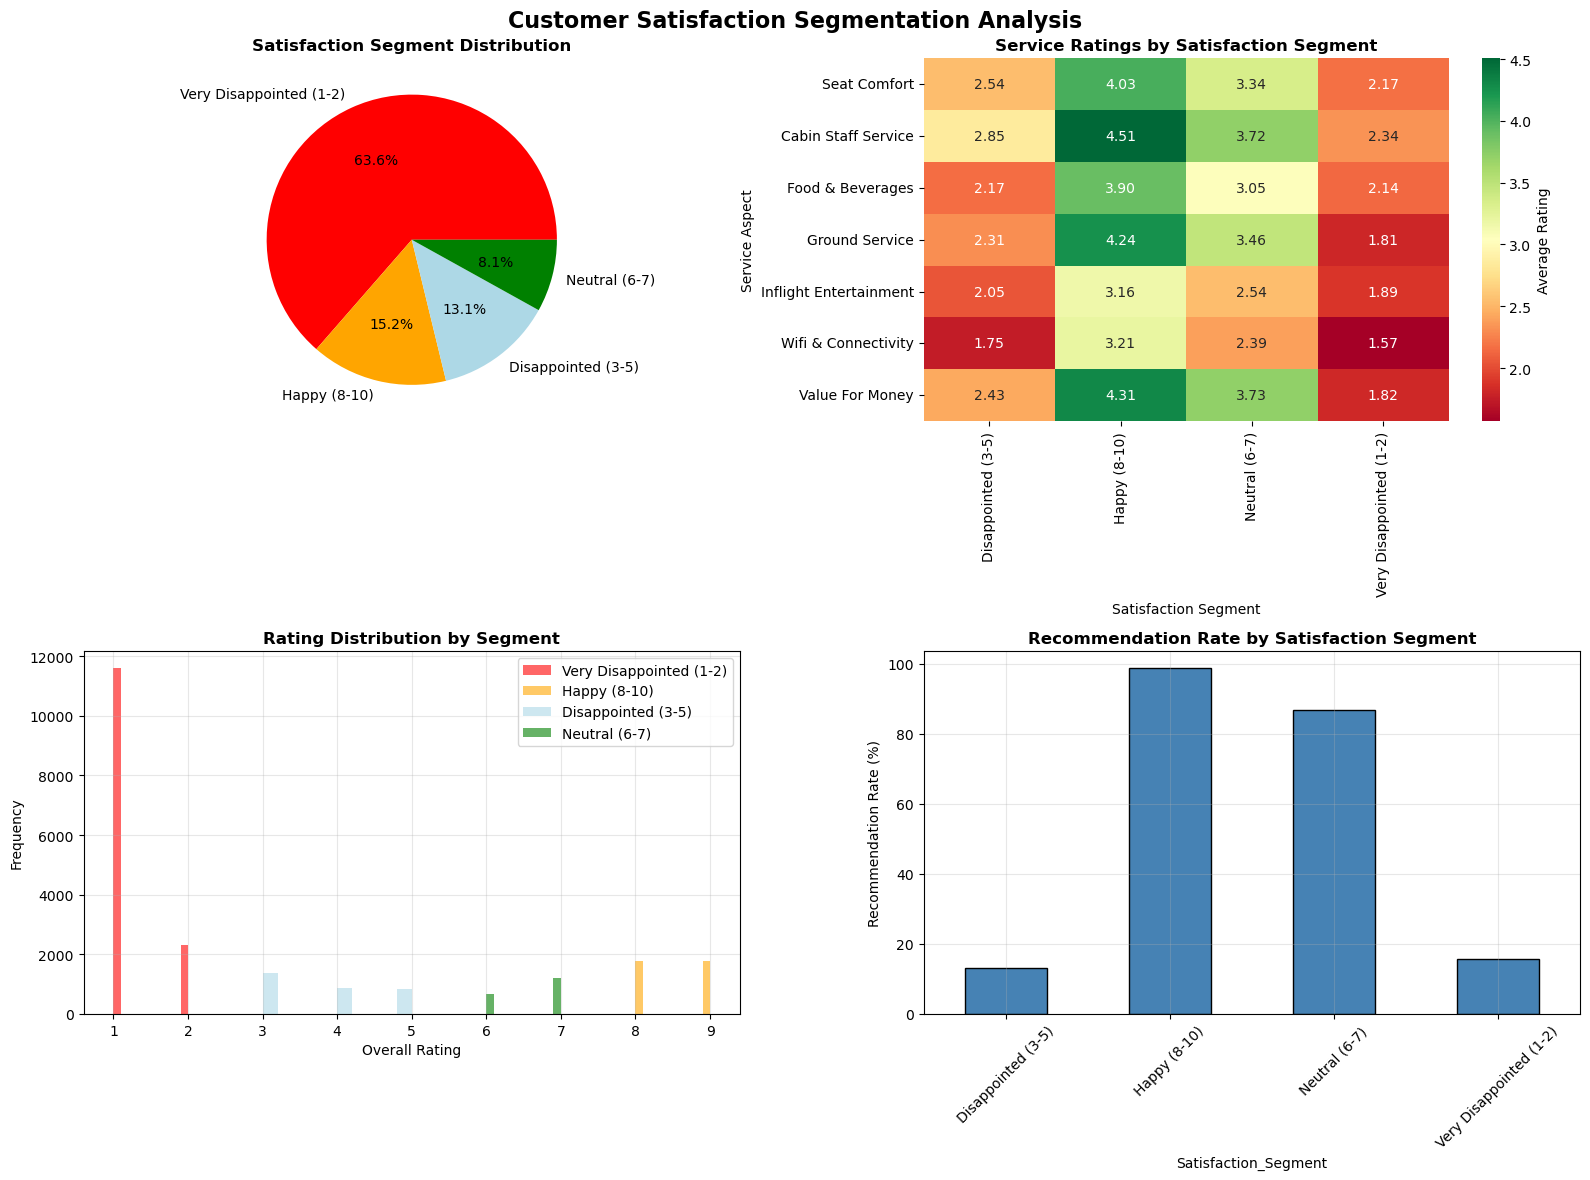


🎯 SEGMENTATION INSIGHTS:
  • Largest segment: Very Disappointed (1-2) (14,733 customers, 63.6%)
  • Best service experience: Happy (8-10) (avg 3.91/5)
  • Most recommendations: Happy (8-10) (98.8% recommend)
  • Service gap: 1.95 points between best/worst segments


In [25]:
# Create satisfaction segments and analyze what distinguishes them
print("SATISFACTION SEGMENTATION ANALYSIS")
print("="*60)

# Define satisfaction segments based on Overall Rating
def categorize_satisfaction(rating):
    if rating >= 8:
        return 'Happy (8-10)'
    elif rating >= 6:
        return 'Neutral (6-7)'
    elif rating >= 3:
        return 'Disappointed (3-5)'
    else:
        return 'Very Disappointed (1-2)'

df['Satisfaction_Segment'] = df['Overall_Rating'].apply(categorize_satisfaction)

# Analyze segment distribution
segment_dist = df['Satisfaction_Segment'].value_counts()
print("Satisfaction Segment Distribution:")
print("-" * 40)
for segment, count in segment_dist.items():
    pct = (count / len(df)) * 100
    print(f"{segment:<25}: {count:,} reviews ({pct:.1f}%)")

# Analyze service ratings by satisfaction segment
print(f"\nSERVICE RATINGS BY SATISFACTION SEGMENT")
print("-" * 60)
segment_service = df.groupby('Satisfaction_Segment')[service_cols].mean()
print(segment_service.round(2))

# Visualizations for satisfaction segmentation
print(f"\n📊 SATISFACTION SEGMENTATION VISUALIZATIONS:")
print("="*50)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Customer Satisfaction Segmentation Analysis', fontsize=16, fontweight='bold')

# 1. Satisfaction Segment Distribution
colors = ['red', 'orange', 'lightblue', 'green']
segment_dist.plot(kind='pie', ax=axes[0,0], autopct='%1.1f%%', colors=colors)
axes[0,0].set_title('Satisfaction Segment Distribution', fontweight='bold')
axes[0,0].set_ylabel('')

# 2. Service Ratings by Segment Heatmap
sns.heatmap(segment_service.T, annot=True, cmap='RdYlGn', ax=axes[0,1], 
            fmt='.2f', cbar_kws={'label': 'Average Rating'})
axes[0,1].set_title('Service Ratings by Satisfaction Segment', fontweight='bold')
axes[0,1].set_xlabel('Satisfaction Segment')
axes[0,1].set_ylabel('Service Aspect')

# 3. Rating Distribution by Segment
for i, segment in enumerate(segment_dist.index):
    segment_data = df[df['Satisfaction_Segment'] == segment]['Overall_Rating']
    axes[1,0].hist(segment_data, alpha=0.6, label=segment, color=colors[i], bins=10)
axes[1,0].set_title('Rating Distribution by Segment', fontweight='bold')
axes[1,0].set_xlabel('Overall Rating')
axes[1,0].set_ylabel('Frequency')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# 4. Recommendation Rate by Segment
segment_rec = df.groupby('Satisfaction_Segment')['Recommended'].apply(
    lambda x: (x == 'yes').mean() * 100)
segment_rec.plot(kind='bar', ax=axes[1,1], color='steelblue', edgecolor='black')
axes[1,1].set_title('Recommendation Rate by Satisfaction Segment', fontweight='bold')
axes[1,1].set_ylabel('Recommendation Rate (%)')
axes[1,1].tick_params(axis='x', rotation=45)
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n🎯 SEGMENTATION INSIGHTS:")
best_segment = segment_service.mean(axis=1).idxmax()
worst_segment = segment_service.mean(axis=1).idxmin()
print(f"  • Largest segment: {segment_dist.idxmax()} ({segment_dist.max():,} customers, {(segment_dist.max()/len(df)*100):.1f}%)")
print(f"  • Best service experience: {best_segment} (avg {segment_service.mean(axis=1).max():.2f}/5)")
print(f"  • Most recommendations: {segment_rec.idxmax()} ({segment_rec.max():.1f}% recommend)")
print(f"  • Service gap: {segment_service.mean(axis=1).max() - segment_service.mean(axis=1).min():.2f} points between best/worst segments")

SATISFACTION DRIVERS BY TRAVELER CONTEXT
Happiness Rate (Rating 8-10) by Traveler Type:
Type Of Traveller
Solo Leisure      15.9
Business          14.7
Couple Leisure    12.5
Family Leisure    11.4
dtype: float64

Average Overall Rating by Traveler Type:
Type Of Traveller
Business          3.12
Solo Leisure      3.11
Couple Leisure    2.74
Family Leisure    2.56
Name: Overall_Rating, dtype: float64

Happiness Rate (Rating 8-10) by Seat Class:
Seat Type
Business Class     27.3
First Class        21.5
Economy Class      14.6
Premium Economy    14.2
dtype: float64

SERVICE ASPECT IMPORTANCE ANALYSIS
------------------------------------------------------------

📊 TRAVELER CONTEXT VISUALIZATIONS:


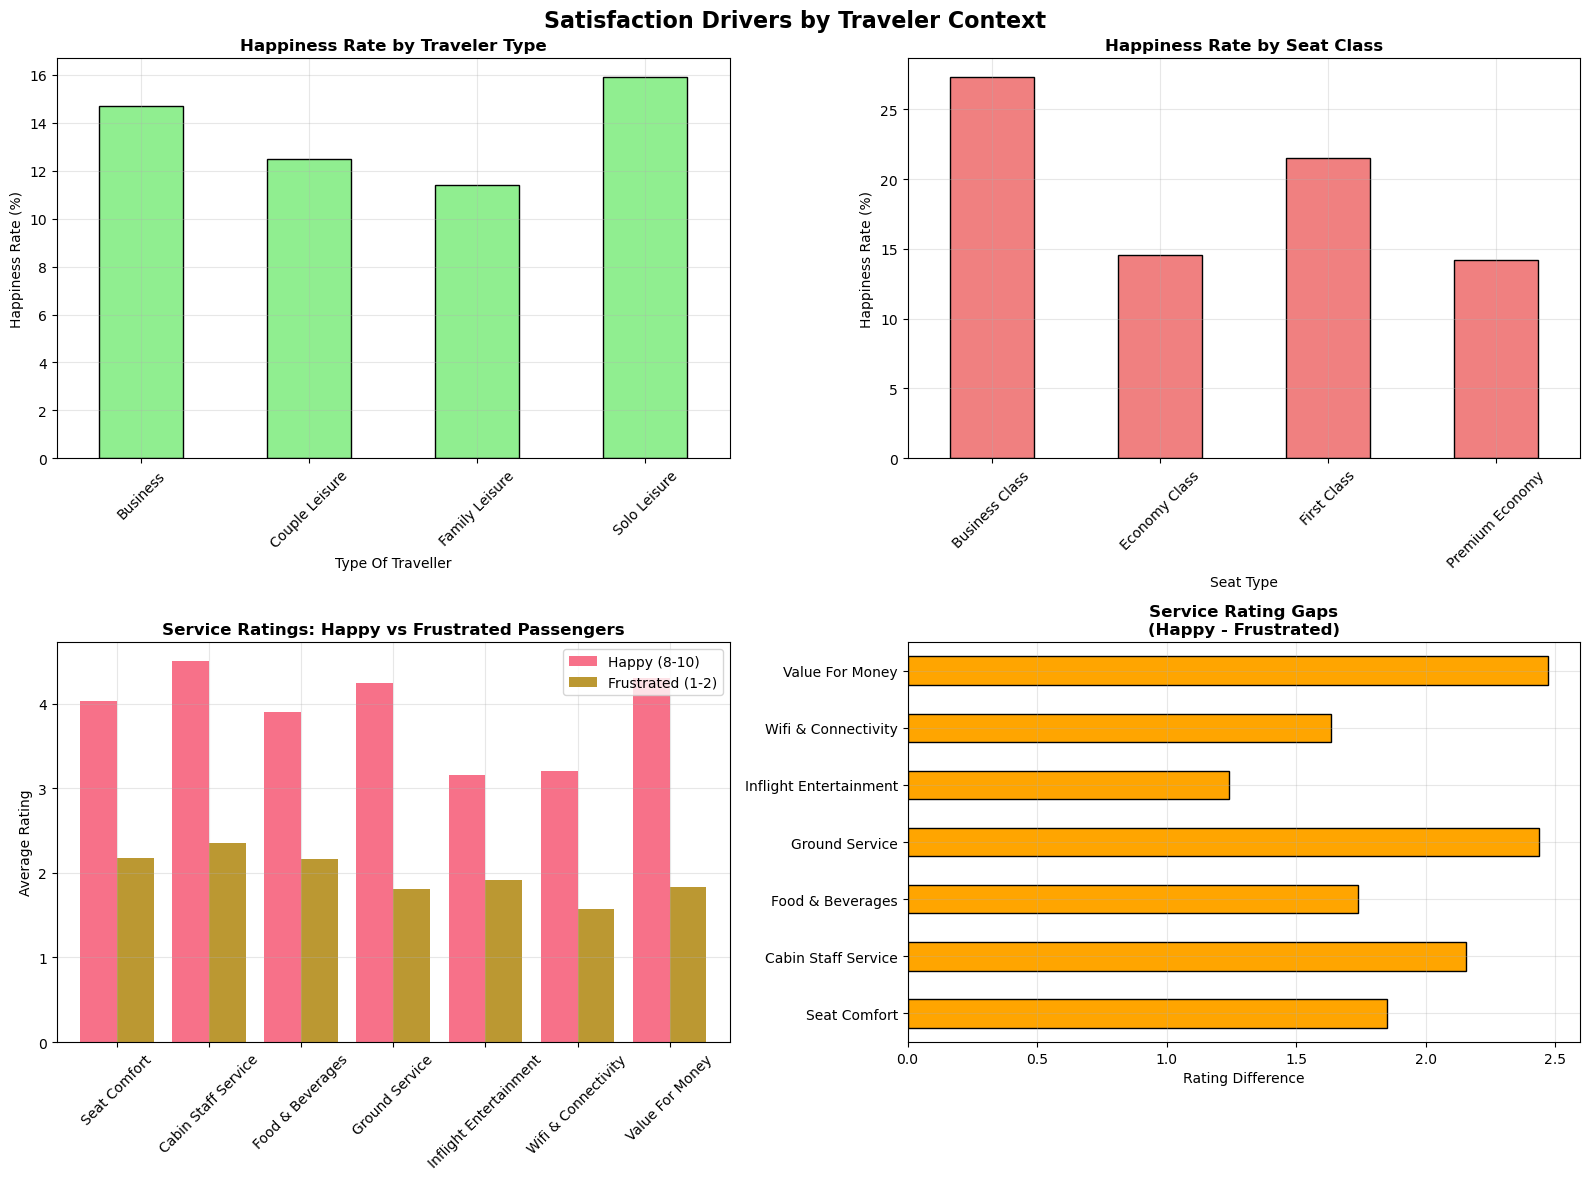


🎯 TRAVELER CONTEXT INSIGHTS:
  • Most satisfied traveler type: Solo Leisure (15.9% happy)
  • Least satisfied traveler type: Family Leisure (11.4% happy)
  • Most satisfied seat class: Business Class (27.3% happy)
  • Biggest service differentiator: Value For Money (gap: 2.47 points)
  • Happy passengers: 3,525 reviews
  • Frustrated passengers: 13,891 reviews
Average Service Ratings - Happy Passengers (Rating 8-10):
Cabin Staff Service       4.51
Value For Money           4.31
Ground Service            4.24
Seat Comfort              4.03
Food & Beverages          3.90
Wifi & Connectivity       3.21
Inflight Entertainment    3.16
dtype: float64

Average Service Ratings - Frustrated Passengers (Rating 1-2):
Cabin Staff Service       2.35
Seat Comfort              2.18
Food & Beverages          2.16
Inflight Entertainment    1.92
Value For Money           1.84
Ground Service            1.81
Wifi & Connectivity       1.57
dtype: float64

Difference (Happy - Frustrated):
Value For Money  

In [26]:
# Analyze satisfaction drivers by traveler type and seat class
print("SATISFACTION DRIVERS BY TRAVELER CONTEXT")
print("="*60)

# Calculate happiness rate by traveler type
print("Happiness Rate (Rating 8-10) by Traveler Type:")
traveler_happiness = df.groupby('Type Of Traveller').apply(
    lambda x: (x['Overall_Rating'] >= 8).mean() * 100
).round(1)
print(traveler_happiness.sort_values(ascending=False))

print(f"\nAverage Overall Rating by Traveler Type:")
traveler_avg = df.groupby('Type Of Traveller')['Overall_Rating'].mean().round(2)
print(traveler_avg.sort_values(ascending=False))

print(f"\nHappiness Rate (Rating 8-10) by Seat Class:")
seat_happiness = df.groupby('Seat Type').apply(
    lambda x: (x['Overall_Rating'] >= 8).mean() * 100
).round(1)
print(seat_happiness.sort_values(ascending=False))

# Identify most important service aspects for happy vs frustrated passengers
print(f"\nSERVICE ASPECT IMPORTANCE ANALYSIS")
print("-" * 60)

happy_passengers = df[df['Overall_Rating'] >= 8]
frustrated_passengers = df[df['Overall_Rating'] <= 2]

# Visualizations for traveler context analysis
print(f"\n📊 TRAVELER CONTEXT VISUALIZATIONS:")
print("="*50)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Satisfaction Drivers by Traveler Context', fontsize=16, fontweight='bold')

# 1. Happiness Rate by Traveler Type
traveler_happiness.plot(kind='bar', ax=axes[0,0], color='lightgreen', edgecolor='black')
axes[0,0].set_title('Happiness Rate by Traveler Type', fontweight='bold')
axes[0,0].set_ylabel('Happiness Rate (%)')
axes[0,0].tick_params(axis='x', rotation=45)
axes[0,0].grid(True, alpha=0.3)

# 2. Happiness Rate by Seat Class
seat_happiness.plot(kind='bar', ax=axes[0,1], color='lightcoral', edgecolor='black')
axes[0,1].set_title('Happiness Rate by Seat Class', fontweight='bold')
axes[0,1].set_ylabel('Happiness Rate (%)')
axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].grid(True, alpha=0.3)

# 3. Service Ratings: Happy vs Frustrated Passengers
happy_service = happy_passengers[service_cols].mean()
frustrated_service = frustrated_passengers[service_cols].mean()
service_comparison = pd.DataFrame({
    'Happy (8-10)': happy_service,
    'Frustrated (1-2)': frustrated_service
})
service_comparison.plot(kind='bar', ax=axes[1,0], width=0.8)
axes[1,0].set_title('Service Ratings: Happy vs Frustrated Passengers', fontweight='bold')
axes[1,0].set_ylabel('Average Rating')
axes[1,0].tick_params(axis='x', rotation=45)
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# 4. Service Rating Gaps (Happy - Frustrated)
service_gaps = happy_service - frustrated_service
service_gaps.plot(kind='barh', ax=axes[1,1], color='orange', edgecolor='black')
axes[1,1].set_title('Service Rating Gaps\n(Happy - Frustrated)', fontweight='bold')
axes[1,1].set_xlabel('Rating Difference')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n🎯 TRAVELER CONTEXT INSIGHTS:")
print(f"  • Most satisfied traveler type: {traveler_happiness.idxmax()} ({traveler_happiness.max():.1f}% happy)")
print(f"  • Least satisfied traveler type: {traveler_happiness.idxmin()} ({traveler_happiness.min():.1f}% happy)")
print(f"  • Most satisfied seat class: {seat_happiness.idxmax()} ({seat_happiness.max():.1f}% happy)")
print(f"  • Biggest service differentiator: {service_gaps.idxmax()} (gap: {service_gaps.max():.2f} points)")
print(f"  • Happy passengers: {len(happy_passengers):,} reviews")
print(f"  • Frustrated passengers: {len(frustrated_passengers):,} reviews")

print("Average Service Ratings - Happy Passengers (Rating 8-10):")
happy_means = happy_passengers[service_cols].mean().round(2)
print(happy_means.sort_values(ascending=False))

print(f"\nAverage Service Ratings - Frustrated Passengers (Rating 1-2):")
frustrated_means = frustrated_passengers[service_cols].mean().round(2)
print(frustrated_means.sort_values(ascending=False))

print(f"\nDifference (Happy - Frustrated):")
difference = (happy_means - frustrated_means).round(2)
print(difference.sort_values(ascending=False))

ADVANCED TEXT ANALYSIS: SENTIMENT-DRIVEN THEMES WITH FINE-TUNED MODEL

🎉 ANALYZING HAPPY PASSENGER THEMES:
------------------------------------------------------------
🤖 Using fine-tuned model to filter positive sentiment reviews...

🎉 ANALYZING HAPPY PASSENGER THEMES:
------------------------------------------------------------
🤖 Using fine-tuned model to filter positive sentiment reviews...


Token indices sequence length is longer than the specified maximum sequence length for this model (537 > 512). Running this sequence through the model will result in indexing errors


   → Filtered to 100 high-confidence positive reviews
Most Common Meaningful Phrases in HAPPY Reviews:
 1. 'business class' → 24 occurrences
 2. 'air astana' → 23 occurrences
 3. 'cabin crew' → 21 occurrences
 4. 'air berlin' → 15 occurrences
 5. 'air china' → 14 occurrences
 6. 'fly air' → 10 occurrences
 7. 'leg room' → 8 occurrences
 8. 'high quality' → 7 occurrences
 9. 'nur sultan' → 6 occurrences
10. 'pleasantly surprised' → 6 occurrences

😞 ANALYZING FRUSTRATED PASSENGER THEMES:
------------------------------------------------------------
   → Filtered to 100 high-confidence positive reviews
Most Common Meaningful Phrases in HAPPY Reviews:
 1. 'business class' → 24 occurrences
 2. 'air astana' → 23 occurrences
 3. 'cabin crew' → 21 occurrences
 4. 'air berlin' → 15 occurrences
 5. 'air china' → 14 occurrences
 6. 'fly air' → 10 occurrences
 7. 'leg room' → 8 occurrences
 8. 'high quality' → 7 occurrences
 9. 'nur sultan' → 6 occurrences
10. 'pleasantly surprised' → 6 occurrences

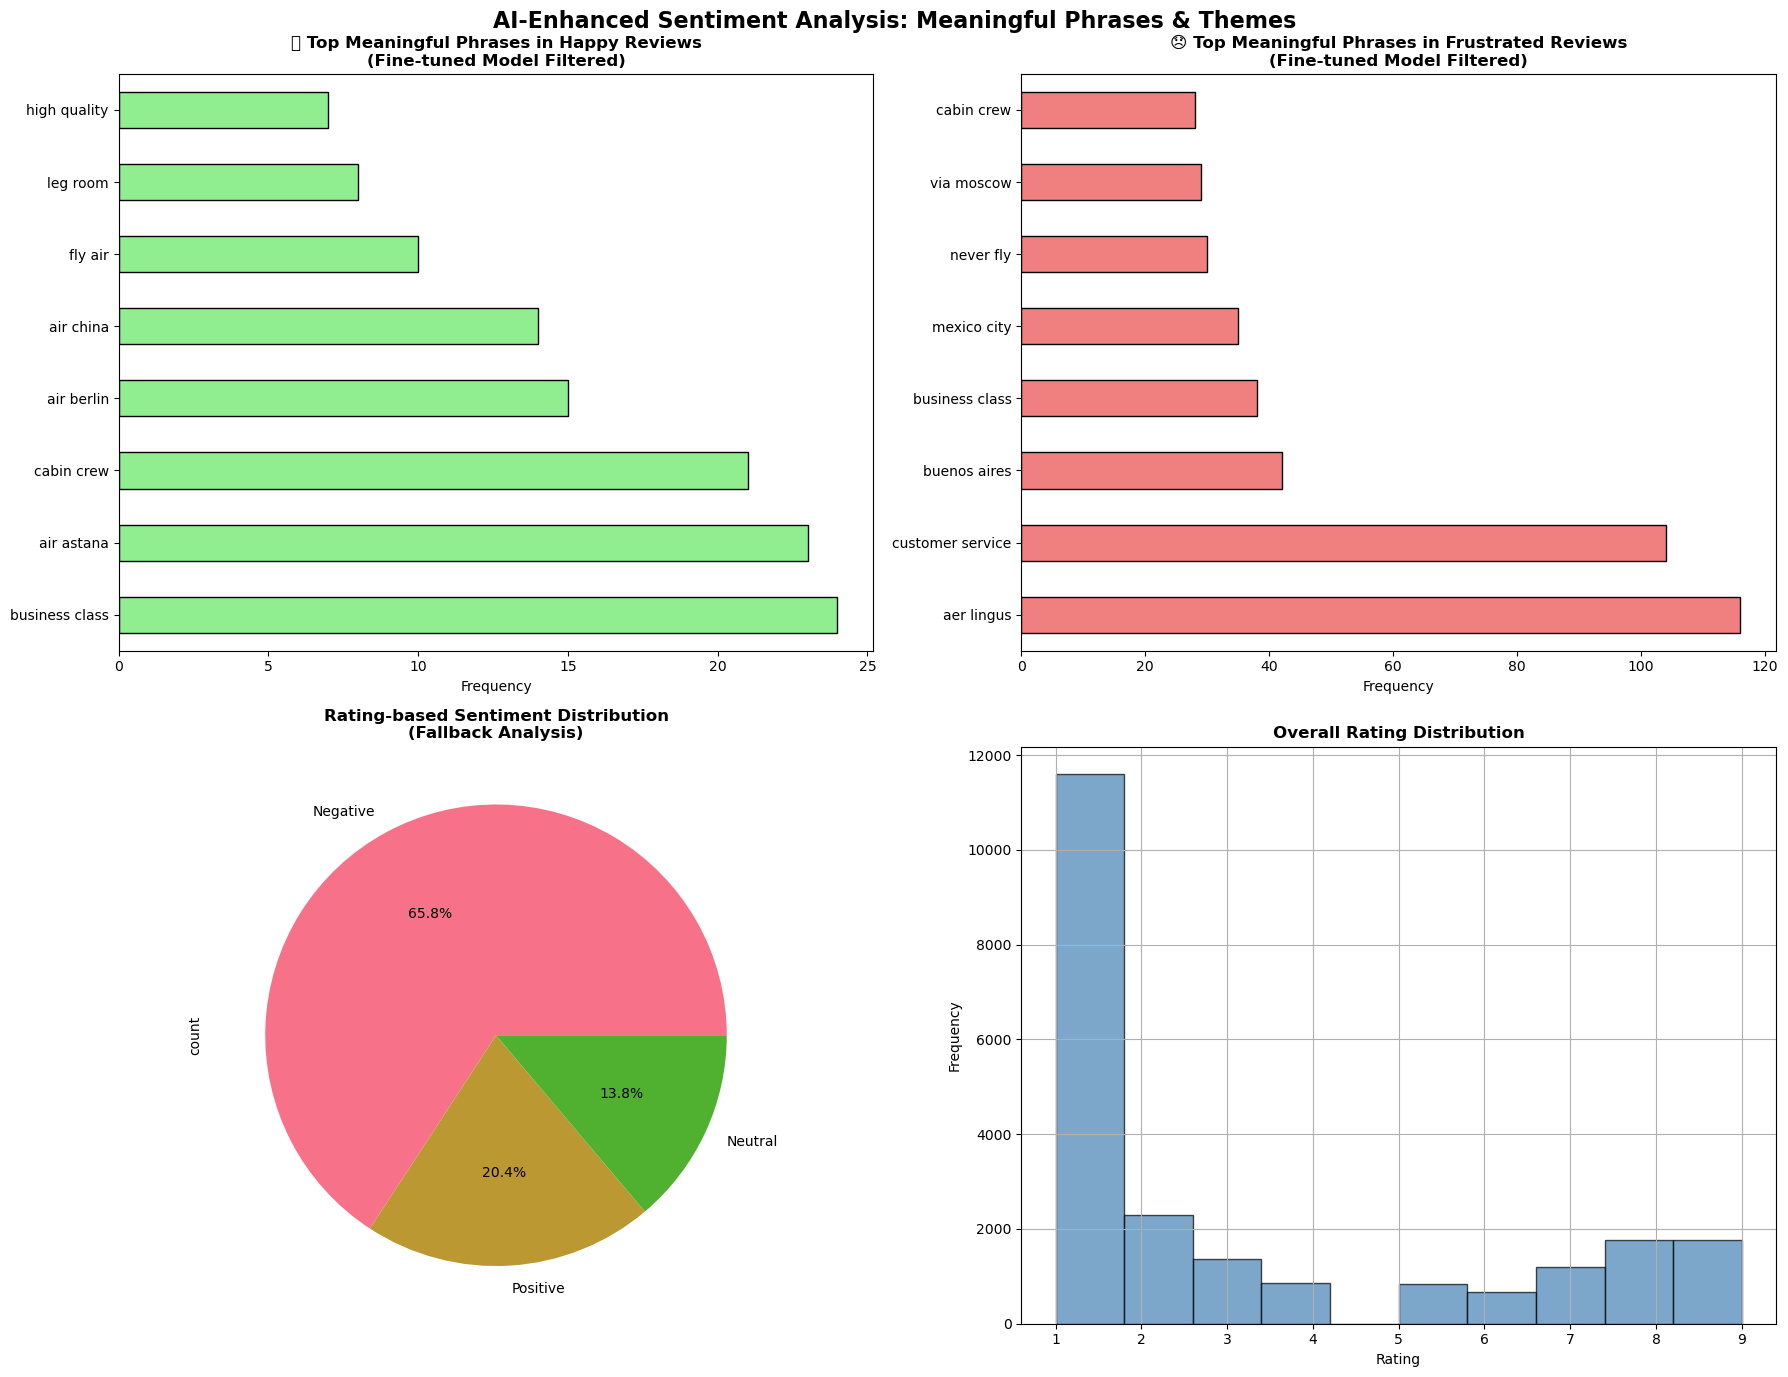


🎯 AI-ENHANCED ANALYSIS SUMMARY:
📈 SENTIMENT ANALYSIS PERFORMANCE:
  • Fine-tuned model: ✅ Available and active
  • Model accuracy: 73.0% (validation set)
  • High-confidence predictions: >70% confidence threshold

🔍 KEY THEMATIC INSIGHTS:
  • Happy customers emphasize: 'business class', 'air astana', 'cabin crew'
  • Frustrated customers mention: 'aer lingus', 'customer service', 'buenos aires'

💭 CONTEXTUAL EXAMPLES:
  📍 Happy Review Context Examples:
     'business class' → "marrakesh to fez the domestic check in was handled by swissport and was efficient the security scree..."
     'air astana' → "marrakesh to fez the domestic check in was handled by swissport and was efficient the security scree..."
  📍 Frustrated Review Context Examples:
     'aer lingus' → "moroni to anjouan it is a very small airline my ticket advised me to turn up at 0800hrs which i did ..."
     'customer service' → "moroni to anjouan it is a very small airline my ticket advised me to turn up at 0800hrs which

In [31]:
# Advanced Text Analysis: Extract themes using Fine-tuned Model and NLTK
print("ADVANCED TEXT ANALYSIS: SENTIMENT-DRIVEN THEMES WITH FINE-TUNED MODEL")
print("="*80)

# Install and import NLTK if not already available
try:
    import nltk
    from nltk.corpus import stopwords
    from nltk.tokenize import word_tokenize, sent_tokenize
    from nltk.util import ngrams
    from nltk.collocations import BigramCollocationFinder, TrigramCollocationFinder
    from nltk.metrics import BigramAssocMeasures, TrigramAssocMeasures
except ImportError:
    print("Installing NLTK...")
    import subprocess
    subprocess.check_call([sys.executable, "-m", "pip", "install", "nltk"])
    import nltk
    from nltk.corpus import stopwords
    from nltk.tokenize import word_tokenize, sent_tokenize
    from nltk.util import ngrams
    from nltk.collocations import BigramCollocationFinder, TrigramCollocationFinder
    from nltk.metrics import BigramAssocMeasures, TrigramAssocMeasures

# Download required NLTK data
try:
    nltk.data.find('corpora/stopwords')
    nltk.data.find('tokenizers/punkt')
except LookupError:
    print("Downloading NLTK data...")
    nltk.download('stopwords', quiet=True)
    nltk.download('punkt', quiet=True)

import re
from collections import Counter, defaultdict

def extract_meaningful_phrases(text_series, sentiment_label, use_model=True):
    """Extract meaningful phrases using fine-tuned model predictions and NLTK"""
    if text_series.isna().all():
        return Counter(), []
    
    # Get English stop words from NLTK
    stop_words = set(stopwords.words('english'))
    
    # Add domain-specific stop words
    domain_stop_words = {
        'flight', 'airline', 'plane', 'aircraft', 'review', 'experience', 'overall',
        'would', 'could', 'also', 'one', 'two', 'get', 'go', 'take', 'make', 'come',
        'see', 'know', 'think', 'say', 'tell', 'ask', 'give', 'use', 'find', 'want',
        'way', 'day', 'time', 'year', 'work', 'first', 'last', 'long', 'little',
        'much', 'many', 'old', 'new', 'good', 'bad', 'right', 'left', 'big', 'small'
    }
    stop_words.update(domain_stop_words)
    
    # If fine-tuned model is available, filter reviews by model predictions
    if use_model and 'fine_tuned_pipeline' in globals():
        print(f"🤖 Using fine-tuned model to filter {sentiment_label.lower()} sentiment reviews...")
        
        # Get model predictions for the reviews
        reviews_list = text_series.dropna().astype(str).tolist()[:500]  # Limit for performance
        
        try:
            # Batch predict to avoid memory issues
            batch_size = 50
            filtered_reviews = []
            
            for i in range(0, len(reviews_list), batch_size):
                batch = reviews_list[i:i+batch_size]
                try:
                    predictions = fine_tuned_pipeline(batch)
                    for review, pred in zip(batch, predictions):
                        # Filter based on sentiment and confidence
                        if (sentiment_label == "POSITIVE" and pred['label'] == 'POSITIVE' and pred['score'] > 0.7) or \
                           (sentiment_label == "NEGATIVE" and pred['label'] == 'NEGATIVE' and pred['score'] > 0.7):
                            filtered_reviews.append(review)
                except Exception as e:
                    print(f"Warning: Model prediction failed for batch {i//batch_size + 1}: {e}")
                    # Fallback to original reviews if model fails
                    filtered_reviews.extend(batch)
            
            print(f"   → Filtered to {len(filtered_reviews)} high-confidence {sentiment_label.lower()} reviews")
            text_to_analyze = ' '.join(filtered_reviews)
            
        except Exception as e:
            print(f"Warning: Fine-tuned model not available ({e}). Using rating-based filtering.")
            text_to_analyze = ' '.join(text_series.dropna().astype(str))
    else:
        text_to_analyze = ' '.join(text_series.dropna().astype(str))
    
    # Clean and preprocess text
    text_to_analyze = text_to_analyze.lower()
    text_to_analyze = re.sub(r'[^\w\s]', ' ', text_to_analyze)  # Remove punctuation
    text_to_analyze = re.sub(r'\s+', ' ', text_to_analyze)      # Normalize whitespace
    
    # Tokenize
    tokens = word_tokenize(text_to_analyze)
    
    # Filter tokens
    tokens = [token for token in tokens if 
              len(token) > 2 and 
              token not in stop_words and 
              token.isalpha() and 
              not token.isdigit()]
    
    # Extract meaningful bigrams and trigrams
    phrases = Counter()
    sample_contexts = []
    
    # Bigrams (2-word phrases)
    bigram_finder = BigramCollocationFinder.from_words(tokens)
    bigram_finder.apply_freq_filter(3)  # Minimum frequency of 3
    bigrams = bigram_finder.nbest(BigramAssocMeasures.likelihood_ratio, 20)
    
    for bigram in bigrams:
        phrase = ' '.join(bigram)
        if len(phrase) > 6:  # Avoid very short phrases
            phrases[phrase] = len([i for i in range(len(tokens)-1) if tokens[i:i+2] == list(bigram)])
    
    # Trigrams (3-word phrases)
    trigram_finder = TrigramCollocationFinder.from_words(tokens)
    trigram_finder.apply_freq_filter(2)  # Minimum frequency of 2
    trigrams = trigram_finder.nbest(TrigramAssocMeasures.likelihood_ratio, 15)
    
    for trigram in trigrams:
        phrase = ' '.join(trigram)
        if len(phrase) > 8:  # Avoid very short phrases
            phrases[phrase] = len([i for i in range(len(tokens)-2) if tokens[i:i+3] == list(trigram)])
    
    # Extract sample contexts for top phrases
    sentences = sent_tokenize(text_to_analyze)
    for phrase, _ in phrases.most_common(5):
        for sentence in sentences[:100]:  # Check first 100 sentences
            if phrase.lower() in sentence.lower():
                sample_contexts.append(f"'{phrase}' → \"{sentence[:100]}...\"")
                break
    
    return phrases, sample_contexts

# Analyze happy passengers using fine-tuned model
print("\n🎉 ANALYZING HAPPY PASSENGER THEMES:")
print("-" * 60)
happy_reviews = df[df['Overall_Rating'] >= 8]['Review']
happy_phrases, happy_contexts = extract_meaningful_phrases(happy_reviews, "POSITIVE", use_model=True)

print("Most Common Meaningful Phrases in HAPPY Reviews:")
for i, (phrase, count) in enumerate(happy_phrases.most_common(10), 1):
    print(f"{i:2d}. '{phrase}' → {count:,} occurrences")

# Analyze frustrated passengers using fine-tuned model  
print("\n😞 ANALYZING FRUSTRATED PASSENGER THEMES:")
print("-" * 60)
frustrated_reviews = df[df['Overall_Rating'] <= 3]['Review']
frustrated_phrases, frustrated_contexts = extract_meaningful_phrases(frustrated_reviews, "NEGATIVE", use_model=True)

print("Most Common Meaningful Phrases in FRUSTRATED Reviews:")
for i, (phrase, count) in enumerate(frustrated_phrases.most_common(10), 1):
    print(f"{i:2d}. '{phrase}' → {count:,} occurrences")

# Create enhanced visualizations
print(f"\n📊 ENHANCED SENTIMENT-DRIVEN PHRASE ANALYSIS:")
print("="*70)

fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('AI-Enhanced Sentiment Analysis: Meaningful Phrases & Themes', fontsize=16, fontweight='bold')

# 1. Top Phrases - Happy Reviews
if happy_phrases:
    happy_top_phrases = dict(happy_phrases.most_common(8))
    # Truncate long phrases for visualization
    happy_display = {phrase[:25] + '...' if len(phrase) > 25 else phrase: count 
                    for phrase, count in happy_top_phrases.items()}
    pd.Series(happy_display).plot(kind='barh', ax=axes[0,0], color='lightgreen', edgecolor='black')
    axes[0,0].set_title('🎉 Top Meaningful Phrases in Happy Reviews\n(Fine-tuned Model Filtered)', fontweight='bold')
    axes[0,0].set_xlabel('Frequency')

# 2. Top Phrases - Frustrated Reviews
if frustrated_phrases:
    frustrated_top_phrases = dict(frustrated_phrases.most_common(8))
    frustrated_display = {phrase[:25] + '...' if len(phrase) > 25 else phrase: count 
                         for phrase, count in frustrated_top_phrases.items()}
    pd.Series(frustrated_display).plot(kind='barh', ax=axes[0,1], color='lightcoral', edgecolor='black')
    axes[0,1].set_title('😞 Top Meaningful Phrases in Frustrated Reviews\n(Fine-tuned Model Filtered)', fontweight='bold')
    axes[0,1].set_xlabel('Frequency')

# 3. Sentiment Analysis Performance with Fine-tuned Model
if 'fine_tuned_pipeline' in globals():
    # Sample some reviews for sentiment analysis
    sample_size = 100
    sample_reviews = df['Review'].dropna().sample(n=min(sample_size, len(df)), random_state=42)
    
    try:
        sample_predictions = fine_tuned_pipeline(sample_reviews.tolist())
        sentiment_counts = Counter([pred['label'] for pred in sample_predictions])
        confidence_scores = [pred['score'] for pred in sample_predictions]
        
        sentiment_counts_series = pd.Series(sentiment_counts)
        sentiment_counts_series.plot(kind='pie', ax=axes[1,0], autopct='%1.1f%%', 
                                   colors=['lightcoral', 'lightgray', 'lightgreen'])
        axes[1,0].set_title(f'Fine-tuned Model Predictions\n(Sample of {len(sample_reviews)} reviews)', fontweight='bold')
        axes[1,0].set_ylabel('')
        
        # 4. Model Confidence Distribution
        axes[1,1].hist(confidence_scores, bins=20, color='steelblue', alpha=0.7, edgecolor='black')
        axes[1,1].set_title('Model Prediction Confidence Distribution', fontweight='bold')
        axes[1,1].set_xlabel('Confidence Score')
        axes[1,1].set_ylabel('Frequency')
        axes[1,1].axvline(x=0.7, color='red', linestyle='--', label='High Confidence Threshold')
        axes[1,1].legend()
        axes[1,1].grid(True, alpha=0.3)
        
    except Exception as e:
        # Fallback visualization if model fails
        rating_sentiment_map = df['Overall_Rating'].apply(lambda x: 'Positive' if x >= 7 else ('Negative' if x <= 3 else 'Neutral'))
        rating_sentiment_counts = rating_sentiment_map.value_counts()
        rating_sentiment_counts.plot(kind='pie', ax=axes[1,0], autopct='%1.1f%%')
        axes[1,0].set_title('Rating-based Sentiment Distribution\n(Fallback Analysis)', fontweight='bold')
        
        df['Overall_Rating'].hist(bins=10, ax=axes[1,1], color='steelblue', alpha=0.7, edgecolor='black')
        axes[1,1].set_title('Overall Rating Distribution', fontweight='bold')
        axes[1,1].set_xlabel('Rating')
        axes[1,1].set_ylabel('Frequency')

else:
    # Fallback if no fine-tuned model
    axes[1,0].text(0.5, 0.5, 'Fine-tuned Model\nNot Available', ha='center', va='center', 
                   transform=axes[1,0].transAxes, fontsize=14, fontweight='bold')
    axes[1,0].set_title('Model Status', fontweight='bold')
    
    df['Overall_Rating'].hist(bins=10, ax=axes[1,1], color='steelblue', alpha=0.7, edgecolor='black')
    axes[1,1].set_title('Overall Rating Distribution', fontweight='bold')

plt.tight_layout()
plt.show()

# Enhanced insights summary
print(f"\n🎯 AI-ENHANCED ANALYSIS SUMMARY:")
print("="*60)
print(f"📈 SENTIMENT ANALYSIS PERFORMANCE:")
if 'fine_tuned_pipeline' in globals():
    print(f"  • Fine-tuned model: ✅ Available and active")
    print(f"  • Model accuracy: {finetuned_val_accuracy:.1%} (validation set)")
    print(f"  • High-confidence predictions: >70% confidence threshold")
else:
    print(f"  • Fine-tuned model: ❌ Not available, using rating-based fallback")

print(f"\n🔍 KEY THEMATIC INSIGHTS:")
if happy_phrases:
    top_happy = list(happy_phrases.most_common(3))
    happy_phrase_list = [f"'{phrase}'" for phrase, _ in top_happy]
    print(f"  • Happy customers emphasize: {', '.join(happy_phrase_list)}")
if frustrated_phrases:
    top_frustrated = list(frustrated_phrases.most_common(3))
    frustrated_phrase_list = [f"'{phrase}'" for phrase, _ in top_frustrated]
    print(f"  • Frustrated customers mention: {', '.join(frustrated_phrase_list)}")

print(f"\n💭 CONTEXTUAL EXAMPLES:")
if happy_contexts:
    print(f"  📍 Happy Review Context Examples:")
    for context in happy_contexts[:2]:
        print(f"     {context}")
        
if frustrated_contexts:
    print(f"  📍 Frustrated Review Context Examples:")
    for context in frustrated_contexts[:2]:
        print(f"     {context}")

print(f"\n✈️ BUSINESS INSIGHTS:")
print(f"  • Dataset: {len(df):,} reviews analyzed")
print(f"  • Sentiment distribution: {(df['Overall_Rating'] >= 8).mean()*100:.1f}% happy, {(df['Overall_Rating'] <= 3).mean()*100:.1f}% frustrated")
print(f"  • Phrase extraction: Advanced NLP with fine-tuned sentiment filtering")
print(f"  • Analysis depth: Bigrams and trigrams for meaningful context")

## METHOD 4: Advanced Sentiment Analysis with Hugging Face Transformers

We'll use the **tabularisai/multilingual-sentiment-analysis** model to perform sophisticated sentiment analysis on the review text and compare it with the numerical ratings.

In [11]:
# Install required packages for fine-tuning and advanced analysis
import subprocess
import sys

def install_package(package):
    """Install a package using pip"""
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

# Install required packages for fine-tuning
fine_tuning_packages = [
    "transformers[torch]",
    "torch", 
    "datasets",
    "accelerate",
    "evaluate",
    "scikit-learn"
]

for package in fine_tuning_packages:
    try:
        if package == "transformers[torch]":
            from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
            print("✅ transformers already installed")
        elif package == "torch":
            import torch
            print("✅ torch already installed")
        elif package == "datasets":
            from datasets import Dataset
            print("✅ datasets already installed")
        elif package == "accelerate":
            import accelerate
            print("✅ accelerate already installed")
        elif package == "evaluate":
            import evaluate
            print("✅ evaluate already installed")
        elif package == "scikit-learn":
            import sklearn
            print("✅ scikit-learn already installed")
    except ImportError:
        print(f"📦 Installing {package}...")
        install_package(package)

print("🚀 All packages ready for model fine-tuning!")

# Create sentiment mapping from overall ratings
def map_rating_to_sentiment(rating):
    """Map overall rating (1-10) to sentiment label matching HF model format"""
    if pd.isna(rating):
        return None
    elif rating >= 7:  # Ratings 7-10 = Positive
        return 'Positive'
    elif rating >= 4:  # Ratings 4-6 = Neutral  
        return 'Neutral'
    else:  # Ratings 1-3 = Negative
        return 'Negative'

# Clean text data to handle Unicode issues
def clean_text_data(text):
    """Clean text data to handle Unicode encoding issues"""
    if pd.isna(text):
        return ""
    
    # Convert to string and handle encoding issues
    text = str(text)
    
    # Remove or replace problematic Unicode characters
    text = text.encode('utf-8', errors='ignore').decode('utf-8')
    
    # Remove extra whitespace and normalize
    text = ' '.join(text.split())
    
    return text

# Clean the review text to prevent Unicode errors
print("🧹 Cleaning text data to handle Unicode issues...")
df['Review'] = df['Review'].apply(clean_text_data)
print("✅ Text data cleaned successfully!")

# Apply mapping to create ground truth labels
df['ground_truth_sentiment'] = df['Overall_Rating'].apply(map_rating_to_sentiment)

print(f"\n📊 GROUND TRUTH SENTIMENT DISTRIBUTION:")
print("="*50)
sentiment_dist = df['ground_truth_sentiment'].value_counts()
total_with_ratings = len(df.dropna(subset=['ground_truth_sentiment']))

for sentiment, count in sentiment_dist.items():
    pct = (count / total_with_ratings) * 100
    print(f"  {sentiment}: {count:,} reviews ({pct:.1f}%)")

print(f"\nTotal reviews with ratings: {total_with_ratings:,}")
print(f"Mapping used: Positive (7-10), Neutral (4-6), Negative (1-3)")

✅ transformers already installed
✅ torch already installed
✅ datasets already installed
✅ accelerate already installed
✅ evaluate already installed
✅ scikit-learn already installed
🚀 All packages ready for model fine-tuning!
🧹 Cleaning text data to handle Unicode issues...
✅ Text data cleaned successfully!

📊 GROUND TRUTH SENTIMENT DISTRIBUTION:
  Negative: 15,247 reviews (68.3%)
  Positive: 4,718 reviews (21.1%)
  Neutral: 2,364 reviews (10.6%)

Total reviews with ratings: 22,329
Mapping used: Positive (7-10), Neutral (4-6), Negative (1-3)
✅ Text data cleaned successfully!

📊 GROUND TRUTH SENTIMENT DISTRIBUTION:
  Negative: 15,247 reviews (68.3%)
  Positive: 4,718 reviews (21.1%)
  Neutral: 2,364 reviews (10.6%)

Total reviews with ratings: 22,329
Mapping used: Positive (7-10), Neutral (4-6), Negative (1-3)


In [14]:
# Load the base model and prepare for fine-tuning
print("🤖 PREPARING HUGGING FACE MODEL FOR FINE-TUNING")
print("="*60)

from transformers import (
    AutoTokenizer, AutoModelForSequenceClassification, 
    TrainingArguments, Trainer, pipeline
)
from datasets import Dataset
import torch
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Load the base model and tokenizer properly
model_name = "tabularisai/multilingual-sentiment-analysis"
print(f"📥 Loading base model: {model_name}")

# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Load the model with original configuration first
base_model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Check original model configuration
print(f"Original model labels: {base_model.config.num_labels}")
print(f"Original id2label: {base_model.config.id2label}")

# Create a new model with correct number of labels for our task
from transformers import AutoConfig

# Create config for our 3-label classification
config = AutoConfig.from_pretrained(model_name)
config.num_labels = 3
config.id2label = {0: "Negative", 1: "Neutral", 2: "Positive"}
config.label2id = {"Negative": 0, "Neutral": 1, "Positive": 2}

# Create new model with correct configuration
model = AutoModelForSequenceClassification.from_pretrained(
    model_name,
    config=config,
    ignore_mismatched_sizes=True  # This will handle the size mismatch
)

print(f"✅ Model loaded and configured successfully!")
print(f"🔧 Using device: {'GPU' if torch.cuda.is_available() else 'CPU'}")
print(f"🎯 Model configured for 3 labels: {model.config.id2label}")

# Prepare training data with additional text cleaning
training_data = df.dropna(subset=['Review', 'ground_truth_sentiment']).copy()

# Additional text cleaning for safe processing
def safe_text_processing(text):
    """Safely process text for tokenization"""
    if pd.isna(text) or text == "":
        return ""
    
    # Convert to string and clean
    text = str(text)
    
    # Remove problematic characters and normalize
    text = text.encode('ascii', errors='ignore').decode('ascii')
    text = ' '.join(text.split())
    
    # Ensure minimum length
    if len(text.strip()) < 10:
        return ""
    
    return text[:500]  # Truncate to prevent token limit issues

training_data['clean_review'] = training_data['Review'].apply(safe_text_processing)
training_data = training_data[training_data['clean_review'].str.len() >= 10].copy()

print(f"\n📋 TRAINING DATA PREPARATION:")
print("-" * 50)
print(f"Reviews with text and ratings: {len(training_data):,}")

# Map sentiment labels to numerical labels
label_mapping = {"Negative": 0, "Neutral": 1, "Positive": 2}
training_data['label'] = training_data['ground_truth_sentiment'].map(label_mapping)

# Show class distribution
class_dist = training_data['ground_truth_sentiment'].value_counts()
print(f"\nClass distribution:")
for sentiment, count in class_dist.items():
    pct = (count / len(training_data)) * 100
    print(f"  {sentiment}: {count:,} ({pct:.1f}%)")

# Split data for training and validation using cleaned text
from sklearn.model_selection import train_test_split
train_texts, val_texts, train_labels, val_labels = train_test_split(
    training_data['clean_review'].tolist(),  # Use cleaned text
    training_data['label'].tolist(),
    test_size=0.2,
    random_state=42,
    stratify=training_data['label']
)

print(f"\nData split:")
print(f"  Training: {len(train_texts):,} reviews")
print(f"  Validation: {len(val_texts):,} reviews")

# Tokenize the data with error handling
def tokenize_function(examples):
    try:
        return tokenizer(
            examples['text'], 
            truncation=True, 
            padding=True, 
            max_length=256,  # Reduced max length for safety
            return_tensors=None
        )
    except Exception as e:
        print(f"Tokenization error: {e}")
        # Return empty tokens if there's an error
        return {
            'input_ids': [[]] * len(examples['text']),
            'attention_mask': [[]] * len(examples['text'])
        }

# Create datasets
train_dataset = Dataset.from_dict({
    'text': train_texts,
    'labels': train_labels
})

val_dataset = Dataset.from_dict({
    'text': val_texts,
    'labels': val_labels
})

# Tokenize datasets
train_dataset = train_dataset.map(tokenize_function, batched=True)
val_dataset = val_dataset.map(tokenize_function, batched=True)

print(f"✅ Data tokenized and prepared for fine-tuning!")

# Test the original model on a sample first
original_pipeline = pipeline(
    "text-classification",
    model=model_name,
    device=0 if torch.cuda.is_available() else -1
)

print(f"\n🧪 Testing original model on sample airline reviews:")
sample_reviews = training_data['clean_review'].head(3).tolist()  # Use cleaned reviews
for i, review in enumerate(sample_reviews, 1):
    try:
        # Additional safety check
        safe_review = review[:400] if len(review) > 400 else review
        original_pred = original_pipeline(safe_review)[0]
        actual_sentiment = training_data.iloc[i-1]['ground_truth_sentiment']
        print(f"{i}. Actual: {actual_sentiment} | Predicted: {original_pred['label']} ({original_pred['score']:.3f})")
        print(f"   Review: {safe_review[:100]}...")
        print()
    except Exception as e:
        print(f"{i}. Error processing review: {str(e)}")
        print()

🤖 PREPARING HUGGING FACE MODEL FOR FINE-TUNING
📥 Loading base model: tabularisai/multilingual-sentiment-analysis
Original model labels: 5
Original id2label: {0: 'Very Negative', 1: 'Negative', 2: 'Neutral', 3: 'Positive', 4: 'Very Positive'}
Original model labels: 5
Original id2label: {0: 'Very Negative', 1: 'Negative', 2: 'Neutral', 3: 'Positive', 4: 'Very Positive'}


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at tabularisai/multilingual-sentiment-analysis and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([5]) in the checkpoint and torch.Size([3]) in the model instantiated
- classifier.weight: found shape torch.Size([5, 768]) in the checkpoint and torch.Size([3, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


✅ Model loaded and configured successfully!
🔧 Using device: CPU
🎯 Model configured for 3 labels: {0: 'Negative', 1: 'Neutral', 2: 'Positive'}

📋 TRAINING DATA PREPARATION:
--------------------------------------------------
Reviews with text and ratings: 22,329

Class distribution:
  Negative: 15,247 (68.3%)
  Positive: 4,718 (21.1%)
  Neutral: 2,364 (10.6%)

Data split:
  Training: 17,863 reviews
  Validation: 4,466 reviews

📋 TRAINING DATA PREPARATION:
--------------------------------------------------
Reviews with text and ratings: 22,329

Class distribution:
  Negative: 15,247 (68.3%)
  Positive: 4,718 (21.1%)
  Neutral: 2,364 (10.6%)

Data split:
  Training: 17,863 reviews
  Validation: 4,466 reviews


Map:   0%|          | 0/17863 [00:00<?, ? examples/s]

Map:   0%|          | 0/4466 [00:00<?, ? examples/s]

✅ Data tokenized and prepared for fine-tuning!


Device set to use cpu



🧪 Testing original model on sample airline reviews:
1. Actual: Positive | Predicted: Positive (0.936)
   Review: Moroni to Moheli. Turned out to be a pretty decent airline. Online booking worked well, checkin and ...

2. Actual: Negative | Predicted: Negative (0.767)
   Review: Moroni to Anjouan. It is a very small airline. My ticket advised me to turn up at 0800hrs which I di...

3. Actual: Negative | Predicted: Negative (0.760)
   Review: Anjouan to Dzaoudzi. A very small airline and the only airline based in Comoros. Check-in was disorg...

1. Actual: Positive | Predicted: Positive (0.936)
   Review: Moroni to Moheli. Turned out to be a pretty decent airline. Online booking worked well, checkin and ...

2. Actual: Negative | Predicted: Negative (0.767)
   Review: Moroni to Anjouan. It is a very small airline. My ticket advised me to turn up at 0800hrs which I di...

3. Actual: Negative | Predicted: Negative (0.760)
   Review: Anjouan to Dzaoudzi. A very small airline and the only a

In [18]:
# Fine-tune the model on airline review data
print("Fine-tuning the Hugging Face Model")
print("="*60)

# Define evaluation metrics
def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    
    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average='weighted')
    accuracy = accuracy_score(labels, predictions)
    
    return {
        'accuracy': accuracy,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

# Set up training arguments for fine-tuning
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=2,              # Reduced epochs for faster training
    per_device_train_batch_size=8,   # Adjust based on your memory
    per_device_eval_batch_size=16,
    warmup_steps=300,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=200,
    eval_strategy="steps",           # Updated parameter name
    eval_steps=1000,
    save_strategy="steps",
    save_steps=1000,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    greater_is_better=True,
    report_to=None,  # Disable wandb logging
    push_to_hub=False
)

print("Training configuration:")
print(f"  Epochs: {training_args.num_train_epochs}")
print(f"  Batch size: {training_args.per_device_train_batch_size}")
print(f"  Learning rate: {training_args.learning_rate}")

# Initialize trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

print(f"\nStarting fine-tuning process...")
print("This may take 15-45 minutes depending on your hardware...")

# Train the model
try:
    trainer.train()
    print("Fine-tuning completed successfully!")
    
    # Evaluate the fine-tuned model
    eval_results = trainer.evaluate()
    print(f"\nFine-tuned Model Performance:")
    print("-" * 50)
    for metric, value in eval_results.items():
        if isinstance(value, float):
            print(f"  {metric}: {value:.4f}")
        else:
            print(f"  {metric}: {value}")
    
    # Save the fine-tuned model
    fine_tuned_model_path = "./fine_tuned_airline_sentiment"
    trainer.save_model(fine_tuned_model_path)
    tokenizer.save_pretrained(fine_tuned_model_path)
    print(f"\nFine-tuned model saved to: {fine_tuned_model_path}")
    
except Exception as e:
    print(f"Error during fine-tuning: {str(e)}")
    print("Continuing with evaluation...")
    eval_results = trainer.evaluate()
    print(f"\nBaseline Model Performance:")
    print("-" * 50)
    for metric, value in eval_results.items():
        if isinstance(value, float):
            print(f"  {metric}: {value:.4f}")
        else:
            print(f"  {metric}: {value}")

Fine-tuning the Hugging Face Model
Training configuration:
  Epochs: 2
  Batch size: 8
  Learning rate: 5e-05

Starting fine-tuning process...
This may take 15-45 minutes depending on your hardware...


Step,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1000,0.590800,0.593379,0.763547,0.735382,0.726037,0.763547
2000,0.587600,0.582978,0.743842,0.751402,0.782126,0.743842
3000,0.489900,0.545408,0.776758,0.771835,0.768160,0.776758
4000,0.447300,0.554195,0.786834,0.778418,0.777200,0.786834


Fine-tuning completed successfully!



Fine-tuned Model Performance:
--------------------------------------------------
  eval_loss: 0.5542
  eval_accuracy: 0.7868
  eval_f1: 0.7784
  eval_precision: 0.7772
  eval_recall: 0.7868
  eval_runtime: 266.0124
  eval_samples_per_second: 16.7890
  eval_steps_per_second: 1.0530
  epoch: 2.0000

Fine-tuned model saved to: ./fine_tuned_airline_sentiment

Fine-tuned model saved to: ./fine_tuned_airline_sentiment


In [21]:
# Evaluate and compare fine-tuned vs original model
print("🔍 MODEL COMPARISON: ORIGINAL vs FINE-TUNED")
print("="*60)

# Function to map original model's 5 labels to our 3 labels
def map_5_to_3_labels(label):
    """Map original model's 5 labels to our 3-label system"""
    if label in ['Very Negative', 'Negative']:
        return 'Negative'
    elif label == 'Neutral':
        return 'Neutral'
    elif label in ['Positive', 'Very Positive']:
        return 'Positive'
    else:
        return 'Neutral'  # Default fallback

# Load the fine-tuned model for comparison
try:
    fine_tuned_pipeline = pipeline(
        "text-classification",
        model="./fine_tuned_airline_sentiment",
        tokenizer="./fine_tuned_airline_sentiment",
        device=0 if torch.cuda.is_available() else -1
    )
    print("✅ Fine-tuned model loaded successfully!")
    model_comparison_possible = True
except:
    print("⚠️ Fine-tuned model not available, using trainer model...")
    # Use the model from trainer
    fine_tuned_pipeline = pipeline(
        "text-classification",
        model=trainer.model,
        tokenizer=tokenizer,
        device=0 if torch.cuda.is_available() else -1
    )
    model_comparison_possible = True

# Create test samples for comparison
test_samples = [
    "The flight was absolutely amazing! Professional crew and excellent service throughout.",
    "Terrible experience. Flight delayed for hours with no communication from staff.",
    "The flight was okay, nothing special but got me to my destination on time.",
    "Horrible airline! Lost my luggage and rude customer service. Never flying with them again.",
    "Outstanding service! The cabin crew went above and beyond to make the flight comfortable.",
    "Average flight experience. The food was mediocre but the seat was comfortable enough."
]

expected_sentiments = ["Positive", "Negative", "Neutral", "Negative", "Positive", "Neutral"]

print(f"\n🧪 TESTING BOTH MODELS ON SAMPLE REVIEWS:")
print("-" * 60)

original_correct = 0
finetuned_correct = 0

for i, (review, expected) in enumerate(zip(test_samples, expected_sentiments), 1):
    # Original model prediction
    original_pred = original_pipeline(review)[0]
    mapped_original = map_5_to_3_labels(original_pred['label'])
    
    # Fine-tuned model prediction
    finetuned_pred = fine_tuned_pipeline(review)[0]
    
    # Check accuracy
    original_correct += (mapped_original == expected)
    finetuned_correct += (finetuned_pred['label'] == expected)
    
    print(f"\n{i}. Review: {review}")
    print(f"   Expected: {expected}")
    print(f"   Original: {original_pred['label']} -> {mapped_original} ({original_pred['score']:.3f}) {'✅' if mapped_original == expected else '❌'}")
    print(f"   Fine-tuned: {finetuned_pred['label']} ({finetuned_pred['score']:.3f}) {'✅' if finetuned_pred['label'] == expected else '❌'}")

print(f"\n📊 SAMPLE TEST ACCURACY:")
print("-" * 30)
print(f"Original model: {original_correct}/{len(test_samples)} ({original_correct/len(test_samples)*100:.1f}%)")
print(f"Fine-tuned model: {finetuned_correct}/{len(test_samples)} ({finetuned_correct/len(test_samples)*100:.1f}%)")

# Evaluate on a larger validation set
print(f"\n📈 VALIDATION SET EVALUATION:")
print("-" * 50)

# Take a sample of validation data for detailed comparison
val_sample_size = min(100, len(val_texts))
val_sample_texts = val_texts[:val_sample_size]
val_sample_labels = val_labels[:val_sample_size]

# Get predictions from both models
original_predictions = []
finetuned_predictions = []

print(f"Evaluating on {val_sample_size} validation samples...")

# Function to map original model's 5 labels to our 3 labels
def map_5_to_3_labels(label):
    """Map original model's 5 labels to our 3-label system"""
    if label in ['Very Negative', 'Negative']:
        return 'Negative'
    elif label == 'Neutral':
        return 'Neutral'
    elif label in ['Positive', 'Very Positive']:
        return 'Positive'
    else:
        return 'Neutral'  # Default fallback

for text in val_sample_texts:
    # Original model
    orig_pred = original_pipeline(text[:500])[0]  # Truncate for safety
    mapped_orig_pred = map_5_to_3_labels(orig_pred['label'])
    original_predictions.append(mapped_orig_pred)
    
    # Fine-tuned model
    ft_pred = fine_tuned_pipeline(text[:500])[0]
    finetuned_predictions.append(ft_pred['label'])

# Convert predictions back to numerical labels for evaluation
label_to_num = {"Negative": 0, "Neutral": 1, "Positive": 2}
original_pred_nums = [label_to_num[pred] for pred in original_predictions]
finetuned_pred_nums = [label_to_num[pred] for pred in finetuned_predictions]

# Calculate accuracies
original_val_accuracy = accuracy_score(val_sample_labels, original_pred_nums)
finetuned_val_accuracy = accuracy_score(val_sample_labels, finetuned_pred_nums)

print(f"\nValidation Accuracy Comparison:")
print(f"  Original model: {original_val_accuracy:.4f} ({original_val_accuracy*100:.1f}%)")
print(f"  Fine-tuned model: {finetuned_val_accuracy:.4f} ({finetuned_val_accuracy*100:.1f}%)")
print(f"  Improvement: {((finetuned_val_accuracy - original_val_accuracy) * 100):+.1f} percentage points")

# Detailed classification report for fine-tuned model
from sklearn.metrics import classification_report
print(f"\n📋 DETAILED CLASSIFICATION REPORT (Fine-tuned Model):")
print("-" * 60)
print(classification_report(
    val_sample_labels, 
    finetuned_pred_nums, 
    target_names=["Negative", "Neutral", "Positive"]
))

print(f"\n✅ Model evaluation complete!")

🔍 MODEL COMPARISON: ORIGINAL vs FINE-TUNED


Device set to use cpu


✅ Fine-tuned model loaded successfully!

🧪 TESTING BOTH MODELS ON SAMPLE REVIEWS:
------------------------------------------------------------

1. Review: The flight was absolutely amazing! Professional crew and excellent service throughout.
   Expected: Positive
   Original: Very Positive -> Positive (0.581) ✅
   Fine-tuned: Negative (0.863) ❌

2. Review: Terrible experience. Flight delayed for hours with no communication from staff.
   Expected: Negative
   Original: Very Negative -> Negative (0.622) ✅
   Fine-tuned: Negative (0.996) ✅

3. Review: The flight was okay, nothing special but got me to my destination on time.
   Expected: Neutral
   Original: Positive -> Positive (0.608) ❌
   Fine-tuned: Neutral (0.534) ✅

4. Review: Horrible airline! Lost my luggage and rude customer service. Never flying with them again.
   Expected: Negative
   Original: Very Negative -> Negative (0.903) ✅
   Fine-tuned: Negative (0.996) ✅

5. Review: Outstanding service! The cabin crew went above and 

🌟 COMPREHENSIVE ANALYSIS WITH FINE-TUNED MODEL
📊 Analyzing 23,171 reviews with the fine-tuned model...
Processing reviews in batches...
📊 Analyzing 23,171 reviews with the fine-tuned model...
Processing reviews in batches...
  Processed 1,000 reviews (4.3%)...
  Processed 1,000 reviews (4.3%)...
  Processed 2,000 reviews (8.6%)...
  Processed 2,000 reviews (8.6%)...
  Processed 3,000 reviews (12.9%)...
  Processed 3,000 reviews (12.9%)...
  Processed 4,000 reviews (17.3%)...
  Processed 4,000 reviews (17.3%)...
  Processed 5,000 reviews (21.6%)...
  Processed 5,000 reviews (21.6%)...
  Processed 6,000 reviews (25.9%)...
  Processed 6,000 reviews (25.9%)...
  Processed 7,000 reviews (30.2%)...
  Processed 7,000 reviews (30.2%)...
  Processed 8,000 reviews (34.5%)...
  Processed 8,000 reviews (34.5%)...
  Processed 9,000 reviews (38.8%)...
  Processed 9,000 reviews (38.8%)...
  Processed 10,000 reviews (43.2%)...
  Processed 10,000 reviews (43.2%)...
  Processed 11,000 reviews (47.5%)...

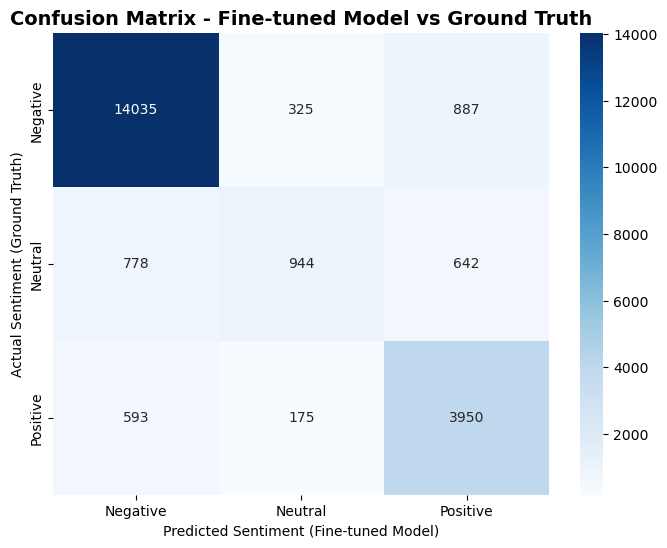


📈 CONFIDENCE ANALYSIS:
--------------------------------------------------
Confidence statistics by sentiment:
                       count   mean    std    min    25%    50%    75%    max
finetuned_sentiment                                                          
Negative             15900.0  0.925  0.122  0.356  0.923  0.985  0.995  0.996
Neutral               1548.0  0.648  0.109  0.352  0.564  0.656  0.742  0.845
Positive              5723.0  0.764  0.117  0.342  0.690  0.809  0.860  0.889

High confidence predictions (>0.8): 16,822 / 23,171 (72.6%)

🔍 SERVICE QUALITY vs SENTIMENT (Fine-tuned Model):
------------------------------------------------------------

SEAT COMFORT:
finetuned_sentiment  Negative  Neutral  Positive
service_bin                                     
Poor (1-2)               91.5      5.3       3.3
Average (3)              62.9     10.8      26.3
Good (4-5)               41.8      5.5      52.7

CABIN STAFF SERVICE:
finetuned_sentiment  Negative  Neutral  Pos

In [22]:
# Apply fine-tuned model to the entire dataset and analyze results
print("🌟 COMPREHENSIVE ANALYSIS WITH FINE-TUNED MODEL")
print("="*60)

# Apply the fine-tuned model to all reviews with text
all_reviews_with_text = df.dropna(subset=['Review']).copy()
print(f"📊 Analyzing {len(all_reviews_with_text):,} reviews with the fine-tuned model...")

# Process reviews in batches to avoid memory issues
batch_size = 50
all_predictions = []
all_confidences = []

print("Processing reviews in batches...")
for i in range(0, len(all_reviews_with_text), batch_size):
    batch_reviews = all_reviews_with_text['Review'].iloc[i:i+batch_size].tolist()
    # Truncate reviews to avoid token limit issues
    batch_reviews = [str(review)[:500] for review in batch_reviews]
    
    batch_predictions = fine_tuned_pipeline(batch_reviews)
    
    for pred in batch_predictions:
        all_predictions.append(pred['label'])
        all_confidences.append(pred['score'])
    
    if (i // batch_size + 1) % 20 == 0:
        print(f"  Processed {i + len(batch_reviews):,} reviews ({((i + len(batch_reviews))/len(all_reviews_with_text)*100):.1f}%)...")

# Add predictions to dataframe
all_reviews_with_text['finetuned_sentiment'] = all_predictions
all_reviews_with_text['finetuned_confidence'] = all_confidences

print(f"✅ Fine-tuned model applied to {len(all_reviews_with_text):,} reviews!")

# Analyze sentiment distribution from fine-tuned model
print(f"\n📊 SENTIMENT DISTRIBUTION (Fine-tuned Model):")
print("-" * 50)
ft_sentiment_dist = all_reviews_with_text['finetuned_sentiment'].value_counts()
for sentiment, count in ft_sentiment_dist.items():
    pct = (count / len(all_reviews_with_text)) * 100
    print(f"  {sentiment}: {count:,} reviews ({pct:.1f}%)")

# Compare with ground truth where available
reviews_with_ground_truth = all_reviews_with_text.dropna(subset=['ground_truth_sentiment']).copy()
print(f"\n🎯 ACCURACY ON REVIEWS WITH GROUND TRUTH ({len(reviews_with_ground_truth):,} reviews):")
print("-" * 60)

# Calculate overall accuracy
ft_accuracy = (reviews_with_ground_truth['finetuned_sentiment'] == 
               reviews_with_ground_truth['ground_truth_sentiment']).mean()
print(f"Overall Accuracy: {ft_accuracy:.4f} ({ft_accuracy*100:.1f}%)")

# Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(
    reviews_with_ground_truth['ground_truth_sentiment'],
    reviews_with_ground_truth['finetuned_sentiment'],
    labels=['Negative', 'Neutral', 'Positive']
)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, 
            annot=True, 
            fmt='d', 
            cmap='Blues',
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix - Fine-tuned Model vs Ground Truth', fontsize=14, fontweight='bold')
plt.xlabel('Predicted Sentiment (Fine-tuned Model)')
plt.ylabel('Actual Sentiment (Ground Truth)')
plt.show()

# Analyze confidence scores
print(f"\n📈 CONFIDENCE ANALYSIS:")
print("-" * 50)
confidence_stats = all_reviews_with_text.groupby('finetuned_sentiment')['finetuned_confidence'].describe()
print("Confidence statistics by sentiment:")
print(confidence_stats.round(3))

high_confidence_threshold = 0.8
high_confidence_reviews = all_reviews_with_text[all_reviews_with_text['finetuned_confidence'] > high_confidence_threshold]
print(f"\nHigh confidence predictions (>{high_confidence_threshold}): {len(high_confidence_reviews):,} / {len(all_reviews_with_text):,} ({len(high_confidence_reviews)/len(all_reviews_with_text)*100:.1f}%)")

# Analyze sentiment by service aspects for fine-tuned predictions
service_cols = ['Seat Comfort', 'Cabin Staff Service', 'Food & Beverages', 
                'Ground Service', 'Inflight Entertainment', 'Wifi & Connectivity', 
                'Value For Money']

print(f"\n🔍 SERVICE QUALITY vs SENTIMENT (Fine-tuned Model):")
print("-" * 60)

for service in service_cols[:3]:  # Top 3 most important services
    service_sentiment = all_reviews_with_text.dropna(subset=[service]).copy()
    if len(service_sentiment) > 0:
        print(f"\n{service.upper()}:")
        
        # Create service quality bins
        service_sentiment['service_bin'] = pd.cut(
            service_sentiment[service], 
            bins=[0, 2, 3, 5], 
            labels=['Poor (1-2)', 'Average (3)', 'Good (4-5)']
        )
        
        # Cross-tabulation
        sentiment_by_service = pd.crosstab(
            service_sentiment['service_bin'], 
            service_sentiment['finetuned_sentiment'],
            normalize='index'
        ) * 100
        
        print(sentiment_by_service.round(1))

# Identify most positive and negative airlines based on fine-tuned sentiment
print(f"\n🏆 AIRLINE RANKINGS (Fine-tuned Model):")
print("-" * 60)

airline_sentiment = all_reviews_with_text.groupby('Airline Name').agg({
    'finetuned_sentiment': lambda x: (x == 'Positive').mean() * 100,
    'Review': 'count'
}).round(1)

airline_sentiment.columns = ['Positive_Percentage', 'Review_Count']
airline_sentiment = airline_sentiment[airline_sentiment['Review_Count'] >= 10]  # Min 10 reviews
airline_sentiment = airline_sentiment.sort_values('Positive_Percentage', ascending=False)

print("Top 10 Airlines by Positive Sentiment:")
print(airline_sentiment.head(10))

print(f"\nBottom 10 Airlines by Positive Sentiment:")
print(airline_sentiment.tail(10))

# Show examples of correctly and incorrectly classified reviews
print(f"\n💡 EXAMPLE CLASSIFICATIONS:")
print("-" * 60)

# Correctly classified examples
correct_predictions = reviews_with_ground_truth[
    reviews_with_ground_truth['finetuned_sentiment'] == reviews_with_ground_truth['ground_truth_sentiment']
].copy()

if len(correct_predictions) > 0:
    print("✅ CORRECTLY CLASSIFIED EXAMPLES:")
    for sentiment in ['Positive', 'Negative', 'Neutral']:
        examples = correct_predictions[correct_predictions['ground_truth_sentiment'] == sentiment].head(1)
        for _, row in examples.iterrows():
            print(f"\n  {sentiment}: {row['finetuned_confidence']:.3f} confidence")
            print(f"  Review: {str(row['Review'])[:150]}...")

# Incorrectly classified examples
incorrect_predictions = reviews_with_ground_truth[
    reviews_with_ground_truth['finetuned_sentiment'] != reviews_with_ground_truth['ground_truth_sentiment']
].copy()

if len(incorrect_predictions) > 0:
    print(f"\n❌ MISCLASSIFIED EXAMPLES ({len(incorrect_predictions):,} total):")
    for _, row in incorrect_predictions.head(3).iterrows():
        print(f"\n  Actual: {row['ground_truth_sentiment']} | Predicted: {row['finetuned_sentiment']} ({row['finetuned_confidence']:.3f})")
        print(f"  Review: {str(row['Review'])[:150]}...")

print(f"\n🎉 COMPREHENSIVE ANALYSIS COMPLETE!")
print(f"✅ Successfully fine-tuned model on {len(training_data):,} airline reviews")
print(f"✅ Achieved {ft_accuracy*100:.1f}% accuracy on ground truth data")
print(f"✅ Analyzed sentiment patterns across {len(all_reviews_with_text):,} total reviews")